# Modelo que Relaciona Recurso y Potencia en Plantas Solares Fotovoltaicas 

## Modelamiento de plantas solares a escala utility más usados en la industria

### Resolución 5-min

Universidad de los Andes  y Consejo Nacional de Operación.

Agosto, 2021.

---

## Agenda
1. Introducción y contexto.

2. Irradiancia POA medida con celda de referencia y producción medida *in situ* con sistema de moniteoreo desde Abr-2020 a Ago-2020.

3. Irradiancia obtenida a partir de Descomposición + Transposición (DISC + Perez-Ineichen 1990) desde Abr-2020 a Ago-2020.

4. Irradiancia obtenida a partir de Descomposición + Transposición (DISC + Perez-Ineichen 1990) desde Ago-2019 a Feb-2021.

5. Conclusiones.

---

## TABLA DE CONTENIDO

### Introducción y Contexto

### Sección 1: Información Geográfica

### Sección 2: Base de Datos
- 2.1. Filtro Datos Hormiga de Irradiancia

### Sección 3: Configuración del Sistema
- 3.1. Inversores
- 3.2. Módulos FV
- 3.3. Configuración de Arreglos FV

### Modelo 1: Datos Medidos
#### 4. Modelado de Producción Planta FV: PVlib
- 4.1. Producción DC: Voltaje, Corriente y Potencia
- 4.2. Pérdidas
- 4.3. Potencia AC
- 4.4. Energía Diaria, Semanal y Mensual
- 4.5. Simulación Modelo

#### 5. Modelado de Producción Planta FV: PVWatts
- 5.1. Producción DC: Voltaje, Corriente y Potencia
- 5.2. Potencia AC
- 5.3. Simulación Modelo

#### 6. Modelado de Producción Planta FV: PVsyst
- 6.1. Producción DC: Voltaje, Corriente y Potencia
- 6.2. Simulación Modelo

#### 7. Comparación de Modelos
- 7.1. Métricas Estadísticas: Potencia AC
- 7.2. Energía Diaria
- 7.3. Energía Semanal
- 7.4. Energía Mensual
- 7.5. Relación Recurso-Potencia

### Modelo 2: Datos Simulados (Descomposición + Transposición)
#### 8. Modelado de Producción Planta FV: PVlib
- 8.1. Posición Solar
- 8.2. Airmass
- 8.3. DNI Extraterrestre
- 8.4. Modelo Descomposición: DISC
- 8.5. Modelo Transposición: Perez-Ineichen 1990
- 8.6. Simulación Modelo

#### 9. Modelado de Producción Planta FV: PVWatts
- 9.1. Simulación Modelo

#### 10. Modelado de Producción Planta FV: PVsyst
- 10.1. Simulación Modelo

#### 11. Comparación de Modelos
- 11.1. Métricas Estadísticas: Potencia AC
- 11.2. Energía Diaria
- 11.3. Energía Semanal
- 11.4. Energía Mensual
- 11.5. Relación Recurso-Potencia

### Modelo 3: Datos Simulados (Descomposición + Transposición Dataset Completo)
#### 12. Modelado de Producción Planta FV: PVlib
- 12.1. Simulación Modelo

#### 13. Modelado de Producción Planta FV: PVWatts
- 13.1. Simulación Modelo

#### 14. Modelado de Producción Planta FV: PVsyst
- 14.1. Simulación Modelo

#### 15. Comparación de Modelos
- 15.1. Métricas Estadísticas: Potencia AC
- 15.2. Energía Diaria
- 15.3. Energía Semanal
- 15.4. Energía Mensual
- 15.5. Relación Recurso-Potencia

### Sección 16: Conclusiones
___

## Introducción y Contexto <span style='color:White'>code:1</span>

1. Estimar la potencia de una planta solar fotovoltaica en la frontera comercial mediante un modelo matemático no es trivial pues **es complejo capturar las dinámicas del clima y operación, además de capturar las pérdidas por conversión y transmisión**.

    - Irradiancia y temperatura (ambiente y del módulo) son las principales fuentes de no-linealidad.
<br><br>
2. Los modelos computacionales buscan solucionar este inconveniente. Sin embargo, **las herramientas comerciales actuales carecen de flexibilidad en las simulaciones que pueden realizar**, lo cual dificulta explorar temas avanzados en el análisis del rendimiento fotovoltaico. Además, todos difieren en diseño, suposiciones, enfoque conceptual, modelamiento matemático y cantidad de datos requeridos.
<br>
3. Según Andrews et al. (2014), los principales inconvenientes de los modelos computacionales son:

    - **Comparación de resultados de desempeño usando diferentes modelos y supuestos**. La solución inmediata es modelar el proyecto con diferentes herramientas. Sin embargo, cada simulación plantea distintas suposiciones, no cuentan con un proceso de validación estándar, y consume más tiempo.

    - **Capacidad para modificar, personalizar y actualizar algoritmos de modelado**. Una interfaz amigable (*user-friendly*) y la accesibilidad al código (*backend*) son atributos que se contraponen. Los modelos comerciales sacrifican el acceso al *backend* para ser más *user-friendly*.
    
    - **Integración automática en flujos de trabajo externos**. Los algoritmos para modelar un sistema FV requieren un conjunto de datos de entrada (*input*). La simulación arroja resultados (*output*) para el mismo periodo de tiempo de los *input*.
    
    - **Capacidad para ver los resultados del modelado intermedio y realizar análisis estadísticos sobre la marcha**. Los modelos comerciales reportan los parámetros que indica el usuario, mas no permite conocer estimaciones intermedias del proceso; únicamente se tiene control de la configuración inicial. 
<br><br>
6. **¿Qué hacemos?:** Alcance 3 de Convenio Específico 5: Protocolo al modelo que relaciona el recurso y la potencia en plantas solares fotovoltaicas.

    - Modelo que permite obtener la producción de la planta a partir de parámetros técnicos (configuración, tecnologías, tipo de seguimiento, entre otros aspectos), irradiancia y otras variables meteorológicas.

    - Prueba de concepto del modelo recomendado, validación con datos disponibles y estimación de los errores e incertidumbres.
    
    - En el presente Jupyter Notebook se suministran las memorias de cálculo debidamente documentadas y el modelo computacional sugerido.
    
<br>

---

[1] R.W. Andrews, J.S. Stein, C. Hansen & D. Riley (2014). Introduction to the open source PVLIB for python pho- tovoltaic system modelling package, IEEE 40th Photovoltaic Specialist Conference (PVSC), pp. 0170–0174, doi: 10.1109/PVSC.2014.6925501.

---

In [1]:
#Configuración
%matplotlib inline
import matplotlib.pyplot as plt

#Built-in Python Modules
import datetime
import inspect
import os
import csv
import math
import random
import warnings
from calendar import monthrange
warnings.filterwarnings(action='ignore')

#Complementos de Python
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import dates as mpl_dates
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

#MMódulos Sandia PVLIB-Python
import pvlib
from pvlib import solarposition, irradiance, atmosphere, pvsystem
from pvlib.location import Location
from pvlib.pvsystem import PVSystem, retrieve_sam
from pvlib.tracking import SingleAxisTracker
from pvlib.modelchain import ModelChain

## 1. Información Geográfica

In [2]:
#Coordenadas Geográficas (Bogotá, DC, Colombia), Edificio SD
latitude = 4.604535
longitude = -74.066038
tz = 'America/Bogota' #Huso Horario UTC-5:00 (America\Bogota) según Minicipio.com.co
altitude = 2632 #Altitud media -msnm- (Meteoblue, Municipio.com.co, Wikipedia)

#Ubicación Geográfica
location = pvlib.location.Location(latitude, longitude, tz, altitude)

## 2. Base de Datos

In [3]:
resolution = '5Min' #['5Min', 'Hourly']
file_name = f'./Meteocontrol/SD_{resolution}.xlsx'

#Meteocontrol Irradiance Measurement
meteocontrolDB = pd.read_excel(io=file_name, sheet_name='Radiacion')
meteocontrolDB = pd.merge(meteocontrolDB, pd.read_excel(io=file_name, sheet_name='Potencia_DC'), on=['Date'])
meteocontrolDB = pd.merge(meteocontrolDB, pd.read_excel(io=file_name, sheet_name='Potencia_AC'), on=['Date'])
meteocontrolDB = pd.merge(meteocontrolDB, pd.read_excel(io=file_name, sheet_name='Temperatura'), on=['Date'])
meteocontrolDB = pd.merge(meteocontrolDB, pd.read_excel(io=file_name, sheet_name='Energia'), on=['Date'])

#Clean Unnamed Columns, from https://stackoverflow.com/questions/19071199/drop-columns-whose-name-contains-a-specific-string-from-pandas-dataframe
cols = [c for c in meteocontrolDB.columns if c[:7] != 'Unnamed']
meteocontrolDB = meteocontrolDB[cols]

#Filter from August 3rd Onwards when the System was Full Operational
meteocontrolDB = meteocontrolDB[meteocontrolDB['Date'] >= '2019-08-03T00:00:00']
meteocontrolDB = meteocontrolDB.fillna(0)
meteocontrolDB.head()

,Date,"Lufft Irrad., W/m2","Meteocontrol Irrad., W/m2","DC Power SysB, W","DC Power SysA, W","DC Power SysB String 1, W","DC Power SysB String 2, W","AC Power SysB, W","AC Power SysA, W","Tmod, ºC","Tamb, ºC","Energy SysB, kWh","Energy SysA, kWh"
576,2019-08-03 00:00:00,0.0,1.112,0.0,0.0,0.0,0.0,0.0,0.0,11.481095,11.481095,0.0,0.0
577,2019-08-03 00:05:00,0.0,1.110,0.0,0.0,0.0,0.0,0.0,0.0,11.452286,11.452286,0.0,0.0
578,2019-08-03 00:10:00,0.0,1.106,0.0,0.0,0.0,0.0,0.0,0.0,11.456021,11.456021,0.0,0.0
579,2019-08-03 00:15:00,0.0,1.106,0.0,0.0,0.0,0.0,0.0,0.0,11.417024,11.417024,0.0,0.0
580,2019-08-03 00:20:00,0.0,1.108,0.0,0.0,0.0,0.0,0.0,0.0,11.345796,11.345796,0.0,0.0


In [4]:
#Change Column Names for ease of use.
if resolution == '5Min':
    res = 5
    data_columns_name = ['Datetime', 'ghi', 'effective_irrad', 'dc_B', 'dc_A', 'dc_B_str1', 'dc_B_str2', 
                         'ac_B', 'ac_A', 'module_temp', 'air_temp', 'energy_B', 'energy_A']

else:
    res = 60
    data_columns_name = ['Datetime', 'ghi', 'effective_irrad', 'dc_B', 'dc_A', 
                         'ac_B', 'ac_A', 'module_temp', 'energy_B', 'energy_A']

meteocontrolDB.columns = data_columns_name
meteocontrolDB = meteocontrolDB.set_index('Datetime')
meteocontrolDB = meteocontrolDB.tz_localize(tz) #Set UTC-5:00
meteocontrolDB = meteocontrolDB.fillna(0)
meteocontrolDB.head()

,ghi,effective_irrad,dc_B,dc_A,dc_B_str1,dc_B_str2,ac_B,ac_A,module_temp,air_temp,energy_B,energy_A
Datetime,,,,,,,,,,,,
2019-08-03 00:00:00-05:00,0.0,1.112,0.0,0.0,0.0,0.0,0.0,0.0,11.481095,11.481095,0.0,0.0
2019-08-03 00:05:00-05:00,0.0,1.110,0.0,0.0,0.0,0.0,0.0,0.0,11.452286,11.452286,0.0,0.0
2019-08-03 00:10:00-05:00,0.0,1.106,0.0,0.0,0.0,0.0,0.0,0.0,11.456021,11.456021,0.0,0.0
2019-08-03 00:15:00-05:00,0.0,1.106,0.0,0.0,0.0,0.0,0.0,0.0,11.417024,11.417024,0.0,0.0
2019-08-03 00:20:00-05:00,0.0,1.108,0.0,0.0,0.0,0.0,0.0,0.0,11.345796,11.345796,0.0,0.0


### 2.1. Filtro Datos Hormiga de Irradiancia

In [5]:
meteocontrolDB.loc[meteocontrolDB.effective_irrad <= 1.5, 'effective_irrad'] = 0

meteocontrolDB.head()

,ghi,effective_irrad,dc_B,dc_A,dc_B_str1,dc_B_str2,ac_B,ac_A,module_temp,air_temp,energy_B,energy_A
Datetime,,,,,,,,,,,,
2019-08-03 00:00:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.481095,11.481095,0.0,0.0
2019-08-03 00:05:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.452286,11.452286,0.0,0.0
2019-08-03 00:10:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.456021,11.456021,0.0,0.0
2019-08-03 00:15:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.417024,11.417024,0.0,0.0
2019-08-03 00:20:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.345796,11.345796,0.0,0.0


## 3. Configuración del Sistema <span style='color:White'>code:2</span>

### 3.1. Inversores

In [6]:
inverters_database = 'CECInverter'
inverters = retrieve_sam(inverters_database)

inverter_A = inverters.ABB__TRIO_50_0_TL_OUTD_US_480__480V_ #51.24 kWp System (SysA)
inverter_B = inverters.ABB__TRIO_27_6_TL_OUTD_S_US_480__480V_ #28.82 kWp System (SysB)

print(inverter_A)

Vac                          480
Pso                      143.487
Paco                       50000
Pdco                     50881.8
Vdco                         720
C0                  -1.28775e-07
C1                      -2.4e-05
C2                      0.001013
C3                     -0.000319
Pnt                            1
Vdcmax                       800
Idcmax                   70.6691
Mppt_low                     520
Mppt_high                    800
CEC_Date              10/15/2018
CEC_Type     Utility Interactive
Name: ABB__TRIO_50_0_TL_OUTD_US_480__480V_, dtype: object


### 3.2. Módulos FV

In [7]:
# Name,Technology,Bifacial,STC,PTC,A_c,Length,Width,N_s,I_sc_ref,V_oc_ref,I_mp_ref,V_mp_ref,alpha_sc,beta_oc,T_NOCT,a_ref,I_L_ref,I_o_ref,R_s,R_sh_ref,Adjust,gamma_r,BIPV,Version,Date
# LG Electronics Inc. LG400N2W-A5,Mono-c-Si,0,400.316000,368.400000,2,2,1,72,10.470000,49.300000,9.860000,40.600000,0.003141,-0.128180,47.700000,1.821208,10.481150,1.807477e-11,0.312859,293.805420,9.380614,-0.360000,N,SAM 2018.11.11 r2,1/3/2019

LG400N2WA5 = {
'BIPV':             'N',
'Date':             '1/3/2019',
'T_NOCT':            47.7,
'A_c':               2.0,
'N_s':               72,
'I_sc_ref':          10.47,
'V_oc_ref':          49.3,
'I_mp_ref':          9.86,
'V_mp_ref':          40.6,
'alpha_sc':          0.003141,
'beta_oc':          -0.12180,
'a_ref':             1.821208,
'I_L_ref':           10.481150,
'I_o_ref':           1.807477e-11,
'R_s':               0.312859,
'R_sh_ref':          293.805420,
'Adjust':            9.380614,
'gamma_r':          -0.36,
'Version':          'NRELv1',
'PTC':               368.4,
'Technology':       'Mono-c-Si',
'Name':             'LG Electronics LG400N2W-A5',
    
#PVSyst Required Variables
'gamma_ref':         1.013, #Diode Quality Factor, Value from PVSyst    
'mu_gamma':          0, #PVSyst specify that mono-cSi modules mu_gamma is very close to zero
'R_sh_0':            3500, #Resistance shunt at 0 irrad., Value from PVSyst                                                           
'R_sh_exp':          5.5, #Experimental resistance shunt, Value from PVSyst
'cells_in_series':   72,    
'EgRef':             1.121,

#PVWatts Required Variables   
'pdc0':              400.316, #Value from PVWatts API and validated with PVSyst API
'gamma_pdc':        -0.0036 #Value from PVWatts API and validated with PVSyst API
}

module = pd.Series(LG400N2WA5, name='LG_Electronics_LG400N2W_A5')

### 3.3. Configuración de Arreglos FV

In [8]:
surface_tilt = 10
surface_azimuth = 180 #Fixed south oriented

#System A
name_A = 'Los Andes 51.25 kWp System'
mps_A = 16 #Modules Per String
spi_A = 8 #Strings Per Inverter

system_A = PVSystem(module_parameters=module, 
                    inverter_parameters=inverter_A, 
                    surface_azimuth=surface_azimuth, 
                    surface_tilt=surface_tilt, 
                    modules_per_string=mps_A, 
                    strings_per_inverter=spi_A)

#System B
name_B = 'Los Andes 28.82 kWp System'
mps_B = 18 #Modules Per String
spi_B = 4 #Strings Per Inverter

system_B = PVSystem(module_parameters=module, 
                    inverter_parameters=inverter_B, 
                    surface_azimuth=surface_azimuth, 
                    surface_tilt=surface_tilt, 
                    modules_per_string=mps_B, 
                    strings_per_inverter=spi_B)

## Modelo 1: Datos Medidos

## 4. Modelado de Producción Planta FV: PVlib <span style='color:White'>code:3</span>

<img src='./figs/pvlib_snl.png' width='500' height='500' />

### 4.1. Producción DC: Voltaje, Corriente y Potencia

A partir de la función ````pvsystem.calcparams_cec```` se obtienen los parámetros del circuito equivalente que modelan la *Curva I-V* para estimar los parámetros DC en los puntos MPP.

La temperatura del módulo que se utilizará en la función ````pvsystem.calcparams_cec```` es la medida. Por otra parte, la irradiancia que se utilizará en la función ````pvsystem.calcparams_cec```` es la obtenida por las mediciones y, para otro estudio de modelamiento, aquella obtenida por la combinación de modelos DISC + Perez-Ineichen 1990 (Descomposición + Transposición).

El circuito equivalente modela el comportamiento eléctrico de un módulo FV descrito de la siguiente manera:
<br>
<br>

$$
I = I_L - I_o \left[ exp \left( \frac{V + I R_s}{a} \right) - 1 \right] - \frac{V + I R_s}{R_{sh}}
$$

<br>
<br>
Siendo $I_L$ la corriente de fotoluminiscencia ---corriente inducida por el efecto fotoeléctrico, $I_o$ la corriente de saturación inversa que causa el fenómeno de difusión en la unión P-N (P-N junction), $a$ el factor de no idealidad modificado, y las resistencias que representan el comportamiento no ideal del panel: resistencia de derivación (shunt) $R_{sh}$ que limita el flujo de corriente causada por defectos de manufactura y la resistencia en serie $R_s$ que reduce la eficiencia por la generación de calor.

<img src='./figs/SingleDiodeCircuit.png' width='300' height='300' />

---

[2] W. De Soto, S.A. Klein & W.A. Beckman (2006). Improvement and validation of a model for photovoltaic array performance, Solar Energy, Vol. 80 (2006), pp. 78–88, doi: 10.1016/j.solener.2005.06.010.

[3] A. Dobos (2012). An improved coefficient calculator for the California Energy Commission 6 parameter photovoltaic module model, ASME, Journal of Solar Energy Engineering, Vol. 134 (2012), doi: 10.1115/1.4005759.

---

In [9]:
def pvlib_dc_production(effective_irradiance, module_temperature):
    #Single Diode Parameters
    IL, I0, Rs, Rsh, nNsVth = pvsystem.calcparams_cec(effective_irradiance,
                                                      module_temperature,
                                                      module['alpha_sc'],
                                                      module['a_ref'],
                                                      module['I_L_ref'],
                                                      module['I_o_ref'],
                                                      module['R_sh_ref'],
                                                      module['R_s'],
                                                      Adjust=9.380614,
                                                      EgRef=1.121,
                                                      dEgdT=-0.0002677)

    curve_info = pvsystem.singlediode(photocurrent=IL,
                                      saturation_current=I0,
                                      resistance_series=Rs,
                                      resistance_shunt=Rsh,
                                      nNsVth=nNsVth,
                                      ivcurve_pnts=100,
                                      method='lambertw')

    #Scalating CEC et. al. Single Diode Results
    data_i_sc = pd.Series(curve_info['i_sc'])
    data_v_oc = pd.Series(curve_info['v_oc'])
    data_i_mp = pd.Series(curve_info['i_mp'])
    data_v_mp = pd.Series(curve_info['v_mp'])
    data_p_mp = pd.Series(curve_info['p_mp'])
    data_i_x = pd.Series(curve_info['i_x'])
    data_i_xx = pd.Series(curve_info['i_xx'])

    results_general = pd.DataFrame({'i_sc': data_i_sc, 
                                    'v_oc': data_v_oc,
                                    'i_mp': data_i_mp, 
                                    'v_mp': data_v_mp, 
                                    'p_mp': data_p_mp, 
                                    'i_x': data_i_x,
                                    'i_xx': data_i_xx})

    #DC Dataframe
    datetime_index = effective_irradiance.index

    dc_A = system_A.scale_voltage_current_power(results_general)
    dc_A = dc_A.set_index(datetime_index)

    dc_B = system_B.scale_voltage_current_power(results_general)
    dc_B = dc_B.set_index(datetime_index)
    
    return dc_A, dc_B

### 4.2. Pérdidas <span style='color:White'>code:4</span>

Se introduce un valor de pérdidas de **26.9%** sobre la producción DC que afectará la Potencia AC y Energía. El valor de 26.9% es el recomendado por el método de estimación de pérdidas de PVWatts y lo valida Marion et al. (2005).

$$
L_{total} \: (\%) = 100 \left[ 1 - \prod {_i} \left( 1 - \frac{L_i}{100} \right)  \right]
$$


| Factor de Pérdida $L_i$ | Valor por Defecto, %|
|-------------------------|---------------------|
| Suciedad                | 2                   | 
| Sombreado               | 3                   | 
| Nieve                   | 0                   | 
| Mismatch                | 2                   | 
| Cable DC                | 2                   | 
| Cable AC                | -                   | 
| Conexione               | 0.5                 | 
| LID                     | 1.5                 | 
| Valor Nominal           | 1                   | 
| Vida Útil               | 0                   | 
| Disponisiblidad         | 3                   | 
| Inversor                | -                   | 

---

[4] A.P. Dobos (2014). PVWatts Version 5 Manual, National Renewable Energy Lab. (NREL), US DOE Office of Energy Efficiency and Renewable Energy (EERE), doi: 10.2172/1158421.

[5] B. Marion, J. Adelstein, K. Boyle, H. Hayden, B. Hammond, T. Fletcher, B. Canada, D. Narang, A. Kimber, L. Mitchell, G. Rich and T. Townsend (2005). Performance parameters for grid-connected PV systems. Conference Record of the IEEE Photovoltaic Specialists Conference, pp. 1601–1606, doi: 10.1109/PVSC.2005.1488451.

---

In [10]:
def losses(dc_A, dc_B):

    losses = 26.9/100 #According to the paper Performance Parameters for Grid-Connected PV Systems by NREL

    #Losses System A
    dc_A['i_mp'] = dc_A['i_mp'] - dc_A['i_mp']*losses
    dc_A['p_mp'] = dc_A['p_mp'] - dc_A['p_mp']*losses

    #Losses System B
    dc_B['i_mp'] = dc_B['i_mp'] - dc_B['i_mp']*losses
    dc_B['p_mp'] = dc_B['p_mp'] - dc_B['p_mp']*losses
    
    return dc_A, dc_B

### 4.3. Potencia AC <span style='color:White'>code:5</span>

La producción AC se estima mediante la función ```pvsystem.snlinverter```, la cual determina la salida de potencia AC a partir de las características técnicas del inversor, y el voltaje y potencia DC, aplicando  el modelo de *Sandia National Laboratory* (SNL).

$$
P_{AC} = \left[ \frac{P_{AC_0}}{A-B} - C \left(A-B \right) \right] \cdot \left( P_{DC} - B \right) - C \left( P_{DC} - B \right)^2 
$$

Donde:

$$
A = P_{DC_0} \left[ 1 + C_1 \left(V_{DC} - V_{DC_0} \right) \right]
$$

$$
B = P_{S_0} \left[ 1 + C_2 \left(V_{DC} - V_{DC_0} \right) \right]
$$

$$
C = C_0 \left[ 1 + C_3 \left(V_{DC} - V_{DC_0} \right) \right]
$$

| Parámetro           	| Unidades 	| Descripción                                                                                                                            	|
|:---------------------:	|:----------:	|:----------------------------------------------------------------------------------------------------------------------------------------	|
| $P_{AC}$            	| W        	| Salida de potencia AC del inversor basada en la entrada de potencia y voltaje DC                                                       	|
| $P_{DC}$            	| W        	| Potencia DC de entrada al inversor                                                                                                     	|
| $V_{DC}$            	| V        	| Voltaje DC de entrada al inversor                                                                                                      	|
| $P_{AC_0}$          	| W        	| Potencia AC máxima del inversor en condición de operación nominal; se asume como el límite superior de saturación                      	|
| $P_{DC_0}$          	| W        	| Potencia DC con la que se alcanza la potencia AC nominal en condición de operación nominal                                             	|
| $V_{DC_0}$          	| V        	| Voltaje DC con el que se alcanza la potencia AC nominal en condición de operación nominal                                              	|
| $P_{S_0}$           	| W        	| Potencia DC necesaria para iniciar el funcionamiento del inversor; influencia la efi- ciencia del inversor a niveles de potencia bajos 	|
| $C_0$               	| 1/W      	| Define la curvatura de la relación entre la potencia DC y AC en dondición de operación nominal                                         	|
| $C_1$, $C_2$, $C_3$ 	| 1/V      	| Coeficientes empíricos que relacionan la variación lineal de $P_{DC_0}$ con $V_{DC}$                                                   	|                                                 	|

De acuerdo con Smets et al. (2016), la principal cualidad del modelo de SNL es que toma en cuenta las fuentes que causan una no linealidad entre la potencia DC y AC para un voltaje DC dado. De esta manera se consigue una eficienta variable del sistema, lo cual es más acertado que asumir una eficiencia lineal. Algunas de las fuentes de pérdidas alteran la eficiencia del inversor y que el modelo SNL tiene en cuenta son:

- Autoconsumo del inversor mediante el parámetro $P_{S_0}$.
- Pérdidas proporcionales a $P_{AC}$ debido a caídas fijas de voltaje en semiconductores.
- Pérdidas resistivas por cableado.

---

[6] A. Smets, K. Jäger, O. Isabella, R. Van Swaaij & M. Zeman (2016). Solar Energy: The physics and engineering of photovoltaic conversion, technologies and systems, 1st Edition. Netherlands and Germany: UIT Cambridge.

---

In [11]:
'''
Shaded reference cell from Oct to Mar.
'''
start = '2020-04-01T00:00:00'
end = '2020-10-01T00:00:00'

'''
Statistic Metrics
'''
def median_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [12]:
def pvlib_ac_power(dc_A, dc_B):
    ac_A = pvsystem.snlinverter(dc_A['v_mp'], dc_A['p_mp'], inverter_A)
    ac_B = pvsystem.snlinverter(dc_B['v_mp'], dc_B['p_mp'], inverter_B)
    
    pvlib_ac = ac_A + ac_B
    
    pvlib_ac.loc[pvlib_ac < 0] = 0
    pvlib_ac.fillna(value=0, inplace=True)
    
    return pvlib_ac

list_r2 = []
list_rmse = []
list_mape = []

def metrics(r2, measured, modeled, store):
    print('R2: ', r2.round(4))

    metrics_df = pd.DataFrame({'measured': measured, 
                               'modeled': modeled})

    y_true = metrics_df.measured
    y_pred = metrics_df.modeled

    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    rmse = (rmse/np.max(y_true))*100
    print('RMSE: ', np.round(rmse, 2))

    '''
    MAPE requires to filter the data when y_true=0 --> (y_true - y_pred)/y_true
    '''
    metrics_df = metrics_df.loc[(metrics_df.index.hour >= 7) & (metrics_df.index.hour <= 17) & (metrics_df.measured != 0)]

    y_true = metrics_df.measured
    y_pred = metrics_df.modeled

    mape = median_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    print('MAPE: ', np.round(mape, 2))
    
    if store == True:
        list_r2.append(r_value)
        list_rmse.append(rmse)
        list_mape.append(mape)

In [13]:
def plot_specs(title, ylabel, xlabel, rot, ylim_min, ylim_max, xlim_min, xlim_max, loc):
    plt.rc('font', family='Helvetica')
    plt.rcParams['axes.axisbelow'] = True;
    
    plt.title(title, fontname="Helvetica", fontsize=15);
    plt.ylabel(ylabel, fontname="Helvetica", fontsize=13);
    plt.xlabel(xlabel, fontname="Helvetica", fontsize=13);
    
    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=rot)
    plt.ylim(ylim_min, ylim_max)
    plt.xlim(xlim_min, xlim_max)
    plt.grid(True);
    plt.legend(loc=loc, fontsize=9);
    plt.tight_layout;

### 4.4. Energía Diaria, Semanal y Mensual

In [14]:
def energy(ACPow, res, shorten):
    ACPow = pd.DataFrame(ACPow)
    ACPow['AC Power'] = ACPow[0]
    del ACPow[0]

    ## Delete -1.0 AC Power Values
    fixCPow = []
    for data in ACPow['AC Power']:
        if data < 0:
            fixCPow.append(0)
        else:
            fixCPow.append(data)

    del ACPow['AC Power']
    ACPow['AC Power'] = fixCPow

    idx = np.linspace(1, len(ACPow), len(ACPow), dtype=int)
    idx = idx - 1
    ACPow['idx'] = idx

    res = res #Data resolution: 1h, i.e. 60 min.
    min_to_hour = res/60 #60 minutes equivalent to hour
    ACPow['Energy'] = ACPow['AC Power']*min_to_hour
    
    #Daily Energy
    daily_energy = []
    for index in ACPow['idx']:
        if index == 0:
            daily_energy.append(0)

        else:
            new_day = ACPow.iloc[index].name.day - ACPow.iloc[index-1].name.day

            if new_day != 0:
                daily_energy.append(0)
            else:
                value = ACPow['Energy'][index] + daily_energy[index-1]
                daily_energy.append(value)

    daily_energy = pd.DataFrame(daily_energy)
    daily_energy = daily_energy.set_index(ACPow.index)

    daily_energy['Daily Energy, kWh'] = daily_energy[0]
    del daily_energy[0]

    #Resampling Measured Daily Energy
    if shorten == True:
        day_mea_energy = meteocontrolDB['energy_A'][start:end] + meteocontrolDB['energy_B'][start:end]
        day_mea_energy = pd.DataFrame(day_mea_energy, columns=['energy'])
        day_mea_energy = day_mea_energy.set_index(meteocontrolDB[start:end].index)
    else:
        day_mea_energy = meteocontrolDB['energy_A'] + meteocontrolDB['energy_B']
        day_mea_energy = pd.DataFrame(day_mea_energy, columns=['energy'])
        day_mea_energy = day_mea_energy.set_index(meteocontrolDB.index)
        
    day_mea_energy = day_mea_energy.resample('1d').max() #Daily energy
    day_mea_energy = day_mea_energy[:-1]
    
    week_mea_energy = day_mea_energy.resample('1w').sum() #Weekly energy
    month_mea_energy = day_mea_energy.resample('1m').sum() #Monthly energy

    #Resampling Simulated Daily Energy
    day_sim_energy = pd.DataFrame(daily_energy['Daily Energy, kWh'])
    day_sim_energy['Daily Energy, kWh'] = day_sim_energy['Daily Energy, kWh']/kilo
    day_sim_energy = day_sim_energy.set_index(daily_energy.index)

    day_sim_energy = day_sim_energy.resample('1d').max() #Daily energy
    day_sim_energy = day_sim_energy[:-1]
    
    week_sim_energy = day_sim_energy.resample('1w').sum() #Weekly energy
    month_sim_energy = day_sim_energy.resample('1m').sum() #Monthly energy
    #month_sim_energy = month_sim_energy[:-1]

    #Energy Dataframes
    day_energy = pd.DataFrame({'measured': day_mea_energy['energy'], 'simulated': day_sim_energy['Daily Energy, kWh']}) #Daily
    week_energy = pd.DataFrame({'measured': week_mea_energy['energy'], 'simulated': week_sim_energy['Daily Energy, kWh']}) #Weekly
    month_energy = pd.DataFrame({'measured': month_mea_energy['energy'], 'simulated': month_sim_energy['Daily Energy, kWh']}) #Monthly
    
    #Percentage Error
    energyerror = {}
    
    for i in ['day', 'week', 'month']:
        if i == 'day':
            y_true = day_mea_energy
            y_pred = day_sim_energy
        
        elif i == 'week':
            y_true = week_mea_energy
            y_pred = week_sim_energy
        
        else:
            y_true = month_mea_energy
            y_pred = month_sim_energy
    
        energyerror[i] = y_true.copy()
        
        y_true = y_true['energy'].values
        y_pred = y_pred['Daily Energy, kWh'].values

        energyerror[i]['perc_error'] = ((np.abs(y_pred - y_true)/y_pred)*100).round(2)
        energyerror[i]['perc_error'] = energyerror[i]['perc_error'].round(decimals=2) 
        
    return day_energy, week_energy, month_energy, energyerror

### 4.5. Simulación Modelo <span style='color:White'>code:6</span>

In [15]:
kilo = 1000

model = 'PVlib'

#DC Production
dc_A, dc_B = pvlib_dc_production(effective_irradiance=meteocontrolDB.effective_irrad[start:end],
                                 module_temperature=meteocontrolDB.module_temp[start:end])

#Losses
dc_A, dc_B = losses(dc_A=dc_A, dc_B=dc_B)

#AC Production
pvlib_ac = pvlib_ac_power(dc_A=dc_A, dc_B=dc_B)

#Energy
pvl_day_energy, pvl_week_energy, pvl_month_energy, pvl_ee = energy(ACPow=pvlib_ac, res=res, shorten=True)

R2:  0.9911
RMSE:  2.46
MAPE:  7.69


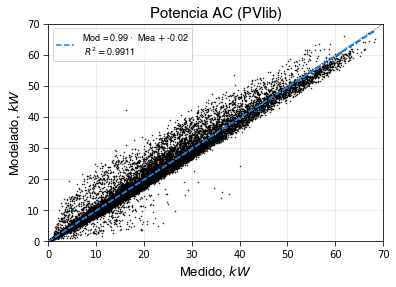

In [16]:
ac = meteocontrolDB.ac_A + meteocontrolDB.ac_B

#Least Squares Linear Regression
x_value = ac[start:end]/kilo
y_value = pvlib_ac/kilo

ac = pd.DataFrame({'measured': x_value, 
                   'modeled': y_value})

ac = ac.dropna()

x_value = ac.measured
y_value = ac.modeled

coef = np.polyfit(x_value, y_value, 1)
poly1d_fn = np.poly1d(coef)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

#Figure
axis_lim = 70

x = np.linspace(0, axis_lim, axis_lim)
y_reg = slope*x + intercept

plt.plot(x_value, 
         poly1d_fn(x_value), 
         '--k',
         label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
               + f"{r_value.round(4)}"), 
         color='#1580E4', linewidth=1.5, zorder = 10)

plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

y = x
plt.plot(x, y, '--', color='#222020', linewidth=0.5)

plot_specs(title=f'Potencia AC ({model})',
           ylabel='Modelado, $kW$',
           xlabel='Medido, $kW$',
           rot=0, 
           ylim_min=0, ylim_max=axis_lim, 
           xlim_min=0, xlim_max=axis_lim, 
           loc='best')

#METRICS
metrics(r2=r_value, measured=x_value, modeled=y_value, store=True)

## 5. Modelado de Producción Planta FV: PVWatts <span style='color:White'>code:7</span>

<img src='./figs/pvwatts_nrel.png' width='500' height='500' />

### 5.1. Producción DC: Voltaje, Corriente y Potencia

Implementa el modelo de potencia DC de NREL PVWatts.

$$
P_{DC} = \frac{G_{POA, \: eff}}{1000} \cdot P_{DC_0} \left[1 + \gamma_{P_{DC}} \left( T_{cell} - T_{ref} \right) \right]
$$

Siendo:
> - $G_{POA, \: eff}$ es la irradiancia efectiva (PVWatts propone aplicar pérdidas de ángulo de incidencia, pero no de suciedad o espectrales).
> - $P_{DC_0}$ la potencia DC de los módulos en condiciones STC.
> - $\gamma_{P_{DC}}$ el coeficiente de temperatura.
> - $T_{cell}$ la temperatura de los módulos.
> - $T_{ref}$ la temperatura de los módulos en condiciones STC.

**Info:** https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.pvsystem.pvwatts_dc.html.

In [17]:
#PVWatts DC Model
def pvwatts_dc_production(effective_irradiance, module_temperature, loss):
    
    pvw_dc = pvsystem.pvwatts_dc(g_poa_effective=effective_irradiance, 
                                 temp_cell=module_temperature, 
                                 pdc0=module['pdc0'], 
                                 gamma_pdc=module['gamma_pdc'], 
                                 temp_ref=25.0)

    #Scalating pvw DC Model Results
    dc_A = pvw_dc*mps_A*spi_A
    dc_B = pvw_dc*mps_B*spi_B
    
    #Decrease Due to Losses
    dc_A = dc_A - dc_A*loss
    dc_B = dc_B - dc_B*loss
    
    return dc_A, dc_B

### 5.2. Potencia AC <span style='color:White'>code:8</span>

Implementa el modelo del inversor de NREL PVWatts.

$$
\eta = \frac{\eta_{nom}}{\eta_{ref}} \left( -0.0162 \cdot \zeta - \frac{0.0059}{\zeta} + 0.9858 \right)
$$

$$
P_{AC} = \text{min} \left(\eta P_{DC}, P_{AC_0} \right)
$$

Donde:

$$
\zeta = \frac{P_{DC}}{P_{DC_0}}
$$

$$
P_{DC_0} = \frac{P_{AC_0}}{\eta_{nom}}
$$

Siendo $P_{DC_0}$ y $P_{AC_0}$ la potencia DC y AC indicada por la capacidad instalada, $\eta_{nom}$ la eficiencia nominal del inversor y $\eta_{ref}$ la eficiencia de referencia del inversor (definida como 0.9637 por PVWatts).

**Info:** https://pvlib-python.readthedocs.io/en/v0.6.0/generated/pvlib.pvsystem.pvwatts_ac.html.

In [18]:
#PVWatts AC Model
def pvwatts_ac_power(dc_A, dc_B):
    ac_A = pvsystem.pvwatts_ac(pdc=dc_A,
                               pdc0=inverter['pdc0'], #Value from PVWatts API
                               eta_inv_nom=inverter['eta_inv_nom'], #Value from PVWatts API
                               eta_inv_ref=0.9637) #Default (CEC Inverter Efficiency shows 0.985)

    ac_B = pvsystem.pvwatts_ac(pdc=dc_B,
                               pdc0=28199.2, #Value from PVWatts API
                               eta_inv_nom=0.97761, #Value from PVWatts API
                               eta_inv_ref=0.9637) #Default
 
    #Changing NaN Values from Both Arrays to Zero (To Avoid Setbacks)
    ac_A = ac_A.fillna(0)
    ac_B = ac_B.fillna(0)
    
    #Net AC Power
    pvwatts_ac = ac_A + ac_B
    
    return pvwatts_ac

### 5.3. Simulación Modelo <span style='color:White'>code:9</span>

In [19]:
kilo = 1000

model = 'PVWatts'

#DC Production
dc_A, dc_B = pvwatts_dc_production(effective_irradiance=meteocontrolDB.effective_irrad[start:end], 
                                   module_temperature=meteocontrolDB.module_temp[start:end], 
                                   loss=26.9/100)

#AC Production
pvwatts_ac = pvwatts_ac_power(dc_A=dc_A, dc_B=dc_B)

#Energy
pvw_day_energy, pvw_week_energy, pvw_month_energy, pvw_ee = energy(ACPow=pvwatts_ac, res=res, shorten=True)

R2:  0.9911
RMSE:  2.45
MAPE:  8.11


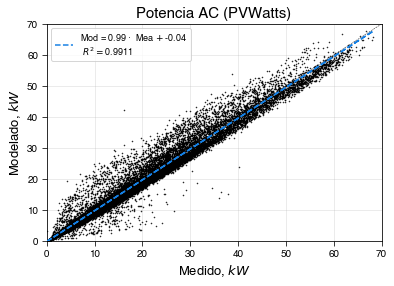

In [20]:
ac = meteocontrolDB.ac_A + meteocontrolDB.ac_B

#Least Squares Linear Regression
x_value = ac[start:end]/kilo
y_value = pvwatts_ac/kilo

ac = pd.DataFrame({'measured': x_value, 
                   'modeled': y_value})

ac = ac.dropna()

x_value = ac.measured
y_value = ac.modeled

coef = np.polyfit(x_value, y_value, 1)
poly1d_fn = np.poly1d(coef)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

#Figure
axis_lim = 70

x = np.linspace(0, axis_lim, axis_lim)
y_reg = slope*x + intercept

plt.plot(x_value, 
         poly1d_fn(x_value), 
         '--k',
         label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
               + f"{r_value.round(4)}"), 
         color='#1580E4', linewidth=1.5, zorder = 10)

plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

y = x
plt.plot(x, y, '--', color='#222020', linewidth=0.5)

plot_specs(title=f'Potencia AC ({model})',
           ylabel='Modelado, $kW$',
           xlabel='Medido, $kW$',
           rot=0, 
           ylim_min=0, ylim_max=axis_lim, 
           xlim_min=0, xlim_max=axis_lim, 
           loc='best')

#METRICS
metrics(r2=r_value, measured=x_value, modeled=y_value, store=True)

## 6. Modelado de Producción Planta FV: PVsyst <span style='color:White'>code:10</span>

<img src='./figs/pvsyst.png' width='350' height='350' />

### 6.1. Producción DC: Voltaje, Corriente y Potencia

La función ````pvsystem.calcparams_pvsyst```` calcula cinco valores de parámetros para la ecuación *single diode* con irradiancia efectiva y temperatura de celda utilizando el modelo PVsyst v6.

El circuito equivalente modela el comportamiento eléctrico de un módulo FV descrito de la siguiente manera:
<br>
<br>

$$
I = I_{ph} - I_o \left[ exp \left( \frac{V + I R_s}{N_{cs} \: \gamma \: k \: T_{cell}} \right) - 1 \right] - \frac{V + I R_s}{R_{sh}}
$$

<br>
<br>
Siendo $~I_{ph}~$ la corriente de fotoluminiscencia ---corriente inducida por el efecto fotoeléctrico, $~I_o~$ la corriente de saturación inversa que causa el fenómeno de difusión en la unión P-N (P-N junction), $~N_{cs}~$ el número de celdas en serie del módulo, $~\gamma~$ el factor de calidad del diodo, $~T_{cell}~$ la temperatura del módulo, y las resistencias que representan el comportamiento no ideal del panel: resistencia de derivación (shunt) $~R_{sh~}$ que limita el flujo de corriente causada por defectos de manufactura y la resistencia en serie $~R_s~$ que reduce la eficiencia por la generación de calor.

<img src='./figs/PVsyst_singlediode.png' width='500' height='500' />

**Info:** https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.pvsystem.calcparams_pvsyst.html y https://www.pvsyst.com/help/index.html?pvmodule_model.htm.

---
[7] K. Sauer, T. Roessler & C. W. Hansen (2015). Modeling the Irradiance and Temperature Dependence of Photovoltaic Modules in PVsyst, IEEE Journal of Photovoltaics v5.

[8] A. Mermoud (2013). PV modules modelling, Presentation at the 2nd PV Performance Modeling Workshop, Santa Clara, CA.

[9] A. Mermoud & T. Lejeune (2010). Performance Assessment of a Simulation Model for PV modules of any available technology, 25th European Photovoltaic Solar Energy Conference, Valencia, Spain.

---

In [21]:
def pvsyst_dc_production(effective_irradiance, module_temperature):
    #Single Diode Parameters
    IL, I0, Rs, Rsh, nNsVth = pvsystem.calcparams_pvsyst(effective_irradiance,
                                                         module_temperature,
                                                         module['alpha_sc'],
                                                         module['gamma_ref'], #Diode Quality Factor, Value from PVSyst
                                                         module['mu_gamma'], #PVSyst specify that mono-cSi modules mu_gamma is very close to zero
                                                         I_L_ref=module['I_L_ref'],
                                                         I_o_ref=module['I_o_ref'],
                                                         R_sh_ref=module['R_sh_ref'],
                                                         R_sh_0=module['R_sh_0'], #Resistance shunt at 0 irrad., Value from PVSyst
                                                         R_s=module['R_s'],
                                                         cells_in_series=module['N_s'],
                                                         R_sh_exp=module['R_sh_exp'],
                                                         EgRef=1.121, #Retrieved from last link at above description
                                                         irrad_ref=1000, #Retrieved from last link at above description
                                                         temp_ref=25) #Retrieved from last link at above description
    
    curve_info = pvsystem.singlediode(photocurrent=IL,
                                      saturation_current=I0,
                                      resistance_series=Rs,
                                      resistance_shunt=Rsh,
                                      nNsVth=nNsVth,
                                      ivcurve_pnts=100,
                                      method='lambertw')

    #Scalating CEC et. al. Single Diode Results
    data_i_sc = pd.Series(curve_info['i_sc'])
    data_v_oc = pd.Series(curve_info['v_oc'])
    data_i_mp = pd.Series(curve_info['i_mp'])
    data_v_mp = pd.Series(curve_info['v_mp'])
    data_p_mp = pd.Series(curve_info['p_mp'])
    data_i_x = pd.Series(curve_info['i_x'])
    data_i_xx = pd.Series(curve_info['i_xx'])

    results_general = pd.DataFrame({'i_sc': data_i_sc, 
                                    'v_oc': data_v_oc,
                                    'i_mp': data_i_mp, 
                                    'v_mp': data_v_mp, 
                                    'p_mp': data_p_mp, 
                                    'i_x': data_i_x,
                                    'i_xx': data_i_xx})

    #DC Dataframe
    datetime_index = effective_irradiance.index

    dc_A = system_A.scale_voltage_current_power(results_general)
    dc_A = dc_A.set_index(datetime_index)

    dc_B = system_B.scale_voltage_current_power(results_general)
    dc_B = dc_B.set_index(datetime_index)
    
    return dc_A, dc_B

### 6.2. Simulación Modelo <span style='color:White'>code:11</span>

In [22]:
kilo = 1000

model = 'PVsyst'

#DC Production
dc_A, dc_B = pvsyst_dc_production(effective_irradiance=meteocontrolDB.effective_irrad[start:end],
                                  module_temperature=meteocontrolDB.module_temp[start:end])

#Losses
dc_A, dc_B = losses(dc_A=dc_A, dc_B=dc_B)

#AC Production
pvsyst_ac = pvlib_ac_power(dc_A=dc_A, dc_B=dc_B)

pvs_day_energy, pvs_week_energy, pvs_month_energy, pvs_ee = energy(ACPow=pvsyst_ac, res=res, shorten=True)

R2:  0.991
RMSE:  2.64
MAPE:  6.26


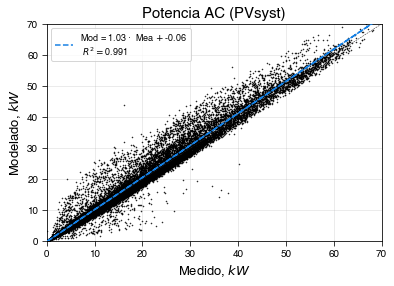

In [23]:
ac = meteocontrolDB.ac_A + meteocontrolDB.ac_B

#Least Squares Linear Regression
x_value = ac[start:end]/kilo
y_value = pvsyst_ac/kilo

ac = pd.DataFrame({'measured': x_value, 
                   'modeled': y_value})

ac = ac.dropna()

x_value = ac.measured
y_value = ac.modeled

coef = np.polyfit(x_value, y_value, 1)
poly1d_fn = np.poly1d(coef)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

#Figure
axis_lim = 70

x = np.linspace(0, axis_lim, axis_lim)
y_reg = slope*x + intercept

plt.plot(x_value, 
         poly1d_fn(x_value), 
         '--k',
         label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
               + f"{r_value.round(4)}"), 
         color='#1580E4', linewidth=1.5, zorder = 10)

plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

y = x
plt.plot(x, y, '--', color='#222020', linewidth=0.5)

plot_specs(title=f'Potencia AC ({model})',
           ylabel='Modelado, $kW$',
           xlabel='Medido, $kW$',
           rot=0, 
           ylim_min=0, ylim_max=axis_lim, 
           xlim_min=0, xlim_max=axis_lim, 
           loc='best')

#METRICS
metrics(r2=r_value, measured=x_value, modeled=y_value, store=True)

## 7. Comparación de Modelos

### 7.1. Métricas Estadísticas: Potencia AC <span style='color:White'>code:12</span>

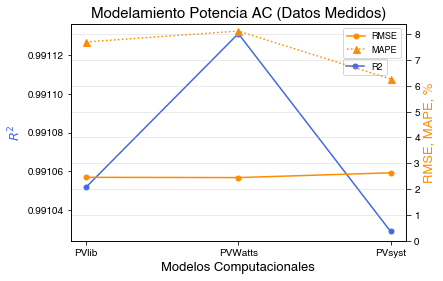

In [24]:
full_models = ['PVlib', 'PVWatts', 'PVsyst']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(full_models, list_r2, color='royalblue', ls='-', marker='o', ms=5, label='R2')
ax2.plot(full_models, list_rmse, color='darkorange', ls='-', marker='o', ms=5, label='RMSE')
ax2.plot(full_models, list_mape, color='darkorange', ls='dotted', marker='^', ms=7, label='MAPE')

ax1.set_xlabel('Modelos Computacionales', fontname="Helvetica", fontsize=13)
ax1.set_ylabel('$R^2$', fontname="Helvetica", fontsize=13, color='royalblue')
ax2.set_ylabel('RMSE, MAPE', fontname="Helvetica", fontsize=13, color='darkorange')

plt.rc('font', family='Helvetica')
plt.rcParams['axes.axisbelow'] = True;

plt.title('Modelamiento Potencia AC (Datos Medidos)', fontname="Helvetica", fontsize=15);
plt.ylabel('RMSE, MAPE, %', fontname="Helvetica", fontsize=13);
#plt.xlabel('Medido, $W/m^2$', fontname="Helvetica", fontsize=13);

plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.xlim(None, None)
plt.ylim(0, None)
plt.grid(True);
plt.legend(loc='upper right', fontsize=9);
ax1.legend(loc=(0.812, 0.765), fontsize=9);
plt.tight_layout;

### 7.2. Energía Diaria <span style='color:White'>code:13</span>

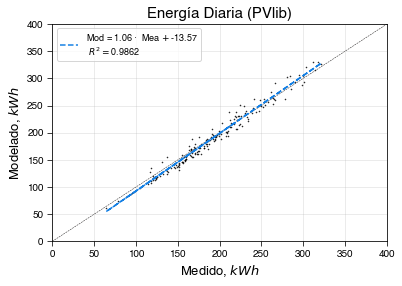

PVlib
R2:  0.9862
RMSE:  3.08
MAPE:  4.26




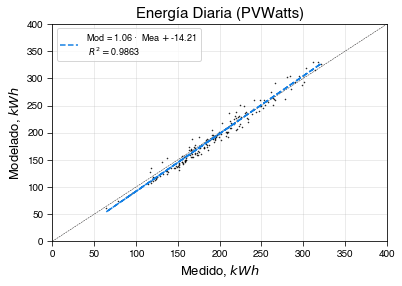

PVWatts
R2:  0.9863
RMSE:  3.11
MAPE:  4.62




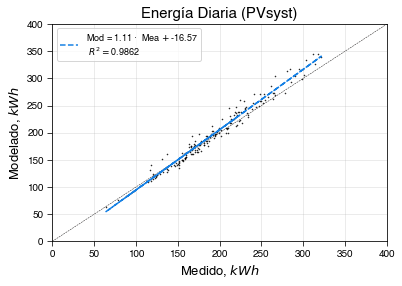

PVsyst
R2:  0.9862
RMSE:  3.77
MAPE:  3.73




In [25]:
for i in full_models:
    if i == 'PVlib':
        x_value = pvl_day_energy.measured
        y_value = pvl_day_energy.simulated
        ee = pvl_ee['day']
    
    elif i == 'PVWatts':
        x_value = pvw_day_energy.measured
        y_value = pvw_day_energy.simulated
        ee = pvw_ee['day']
    
    else:
        x_value = pvs_day_energy.measured
        y_value = pvs_day_energy.simulated
        ee = pvs_ee['day']
    
    #Figure
    plt.figure()

    #Least Squares Linear Regression
    coef = np.polyfit(x_value, y_value, 1)
    poly1d_fn = np.poly1d(coef)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

    #Figure
    axis_lim = 400

    x = np.linspace(0, axis_lim, axis_lim)
    y_reg = slope*x + intercept

    plt.plot(x_value, 
             poly1d_fn(x_value), 
             '--k',
             label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
                   + f"{r_value.round(4)}"), 
             color='#1580E4', linewidth=1.5, zorder = 10)

    plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

    y = x
    plt.plot(x, y, '--', color='#222020', linewidth=0.5)

    plot_specs(title=f'Energía Diaria ({i})',
               ylabel='Modelado, $kWh$',
               xlabel='Medido, $kWh$',
               rot=0, 
               ylim_min=0, ylim_max=axis_lim, 
               xlim_min=0, xlim_max=axis_lim, 
               loc='best')
    
    plt.show()
    
    #Metrics
    print(i)
    print('R2: ', r_value.round(4))

    metrics_data = pd.DataFrame({'effective_irrad': x_value, 
                                 'poa': y_value})

    y_true = metrics_data.effective_irrad
    y_pred = metrics_data.poa

    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    rmse = (rmse/np.max(y_true))*100
    print('RMSE: ', np.round(rmse, 2))

    '''
    MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
    '''
    ee = ee.loc[ee.energy != 0]

    print('MAPE: ', np.round(ee['perc_error'].median(), 2))
    print('\n')

### 7.3. Energía Semanal <span style='color:White'>code:14</span>

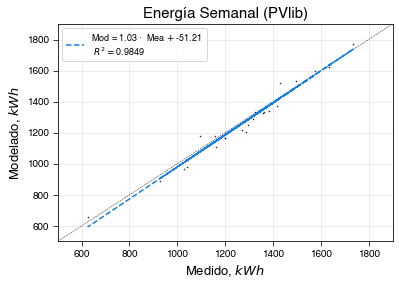

PVlib
R2:  0.9849
RMSE:  2.52
MAPE:  2.52




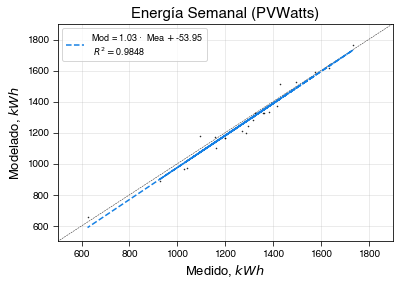

PVWatts
R2:  0.9848
RMSE:  2.6
MAPE:  2.98




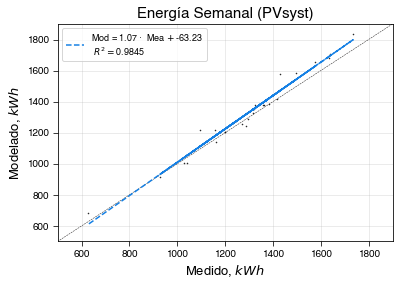

PVsyst
R2:  0.9845
RMSE:  3.25
MAPE:  2.64




In [26]:
for i in full_models:
    if i == 'PVlib':
        x_value = pvl_week_energy.measured
        y_value = pvl_week_energy.simulated
        ee = pvl_ee['week']
    
    elif i == 'PVWatts':
        x_value = pvw_week_energy.measured
        y_value = pvw_week_energy.simulated
        ee = pvw_ee['week']
    
    else:
        x_value = pvs_week_energy.measured
        y_value = pvs_week_energy.simulated
        ee = pvs_ee['week']
    
    #Figure
    plt.figure()

    #Least Squares Linear Regression
    coef = np.polyfit(x_value, y_value, 1)
    poly1d_fn = np.poly1d(coef)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

    #Figure
    axis_lim = 1900

    x = np.linspace(0, axis_lim, axis_lim)
    y_reg = slope*x + intercept

    plt.plot(x_value, 
             poly1d_fn(x_value), 
             '--k',
             label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
                   + f"{r_value.round(4)}"), 
             color='#1580E4', linewidth=1.5, zorder = 10)

    plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

    y = x
    plt.plot(x, y, '--', color='#222020', linewidth=0.5)

    plot_specs(title=f'Energía Semanal ({i})',
               ylabel='Modelado, $kWh$',
               xlabel='Medido, $kWh$',
               rot=0, 
               ylim_min=500, ylim_max=axis_lim, 
               xlim_min=500, xlim_max=axis_lim, 
               loc='best')
    
    plt.show()
    
    #Metrics
    print(i)
    print('R2: ', r_value.round(4))

    metrics_data = pd.DataFrame({'effective_irrad': x_value, 
                                 'poa': y_value})

    y_true = metrics_data.effective_irrad
    y_pred = metrics_data.poa

    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    rmse = (rmse/np.max(y_true))*100
    print('RMSE: ', np.round(rmse, 2))

    '''
    MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
    '''
    ee = ee.loc[ee.energy != 0]

    print('MAPE: ', np.round(ee['perc_error'].median(), 2))
    print('\n')

### 7.4. Energía Mensual <span style='color:White'>code:15</span>

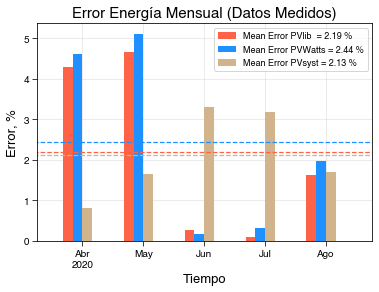

In [27]:
#Energy Error Comparison Plot
bar_width = 0.08
width = bar_width*2

months = ['Abr\n2020', 'May', 'Jun', 'Jul', 'Ago']

x = np.arange(len(months))

r1 = np.arange(len(months))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

#Mean Error Values
pvlib_meanerror = round(pvl_ee['month']['perc_error'][0:5].mean(), 2)
pvwatts_meanerror = round(pvw_ee['month']['perc_error'][0:5].mean(), 2)
pvsyst_meanerror = round(pvs_ee['month']['perc_error'][0:5].mean(), 2)

#Bar Plots
hor, ver = 13, 5
#plt.figure(figsize=(hor,ver))

plt.bar(r1, pvl_ee['month']['perc_error'][0:5], width, 
        label='Mean Error PVlib  = ' + f'{pvlib_meanerror}' + ' %', color='tomato', linewidth=2)

plt.bar(r3, pvw_ee['month']['perc_error'][0:5], width, 
        label='Mean Error PVWatts = ' + f'{pvwatts_meanerror}' + ' %', color='dodgerblue', linewidth=2)

plt.bar(r5, pvs_ee['month']['perc_error'][0:5], width, 
        label='Mean Error PVsyst = ' + f'{pvsyst_meanerror}' + ' %', color='tan', linewidth=2)

#Horizontal Lines
plt.hlines(y=0, xmin=-1, xmax=x[-1]+1, colors='black', linestyles='solid', linewidth=0.5) #Zero
plt.hlines(y=pvlib_meanerror, xmin=-1, xmax=x[-1]+1, colors='tomato', linestyles='--', linewidth=1.25)
plt.hlines(y=pvwatts_meanerror, xmin=-1, xmax=x[-1]+1, colors='dodgerblue', linestyles='--', linewidth=1.25)
plt.hlines(y=pvsyst_meanerror, xmin=-1, xmax=x[-1]+1, colors='tan', linestyles='--', linewidth=1.25)

plt.xticks(r4, months)
plot_specs(title='Error Energía Mensual (Datos Medidos)',
           ylabel='Error, %',
           xlabel='Tiempo',
           rot=0, 
           ylim_min=0, ylim_max=None, 
           xlim_min=-0.5, xlim_max=5, 
           loc='best')
plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize=9);

### 7.5. Relación Recurso-Potencia <span style='color:White'>code:16</span>

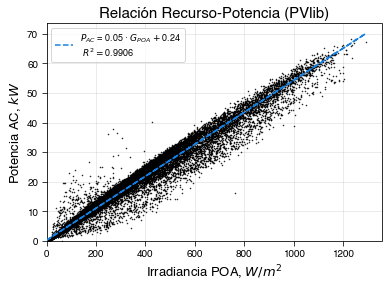

In [28]:
ac = meteocontrolDB.ac_A + meteocontrolDB.ac_B

#Least Squares Linear Regression
y_value = ac[start:end]/kilo
x_value = meteocontrolDB.effective_irrad[start:end]

ac = pd.DataFrame({'measured': x_value, 
                   'modeled': y_value})

ac = ac.dropna()

x_value = ac.measured
y_value = ac.modeled

coef = np.polyfit(x_value, y_value, 1)
poly1d_fn = np.poly1d(coef)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

#Figure
plt.plot(x_value, 
         poly1d_fn(x_value), 
         '--k',
         label=('$P_{AC}$ = ' + f'{slope.round(2)} $· \:$' + '$G_{POA}$ $+ \:$' + f'{intercept.round(2)} \n $R^2 = $' 
               + f'{r_value.round(4)}'), 
         color='#1580E4', linewidth=1.5, zorder = 10)

plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

plot_specs(title=f'Relación Recurso-Potencia (PVlib)',
           ylabel='Potencia AC, $kW$',
           xlabel='Irradiancia POA, $W/m^2$',
           rot=0, 
           ylim_min=0, ylim_max=None, 
           xlim_min=0, xlim_max=None, 
           loc='best')

## Modelo 2: Datos Simulados (Descomposición + Transposición) <span style='color:White'>code:18</span>

## 8. Modelado de Producción Planta FV: PVlib

<img src='pvlib_snl.png' width='500' height='500' />

### 8.1. Posición Solar

El algoritmo de posición solar predeterminado se basa en **Reda and Andreas (2004)**.

Además de ```nrel_numpy``` (algoritmo por defecto), también están disponibles los siguientes métodos: ``` nrel_numba```, ```pyephem```, ``` ephemeris``` y ```nrel_c```.

**Info:** https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.solarposition.get_solarposition.html.

In [29]:
#Calculate solar position parameters
solpos = location.get_solarposition(times=meteocontrolDB.index,
                                    method='nrel_numpy')

solpos.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
Datetime,,,,,,
2019-08-03 00:00:00-05:00,157.811514,157.811514,-67.811514,-67.811514,358.414929,-6.244021
2019-08-03 00:05:00-05:00,157.812572,157.812572,-67.812572,-67.812572,1.570773,-6.243755
2019-08-03 00:10:00-05:00,157.745111,157.745111,-67.745111,-67.745111,4.717104,-6.243488
2019-08-03 00:15:00-05:00,157.609750,157.609750,-67.609750,-67.609750,7.834610,-6.243222
2019-08-03 00:20:00-05:00,157.407710,157.407710,-67.407710,-67.407710,10.905014,-6.242955


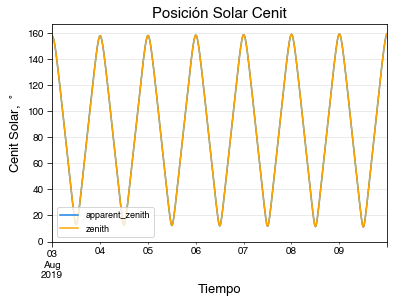

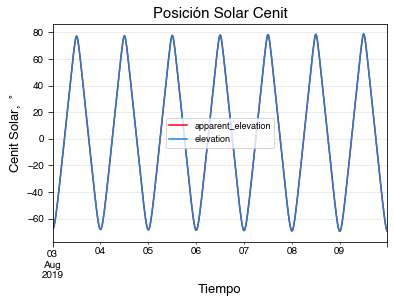

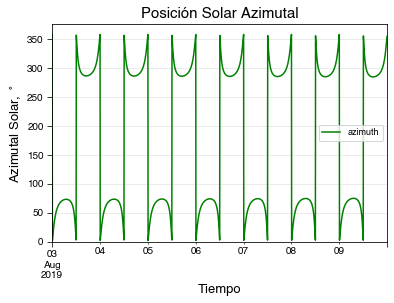

In [30]:
#Zenith
plt.figure()

a = 0
ndays = 7

if resolution == '5Min':
    n_data = 288
else:
    n_data = 24

b = a + ndays*n_data

solpos['apparent_zenith'][a:b].plot(label='apparent_zenith', color='#1580E4');
solpos['zenith'][a:b].plot(label='zenith', color='orange');

plot_specs(title='Posición Solar Cenit',
           ylabel='Cenit Solar, $^\circ$',
           xlabel='Tiempo',
           rot=None, 
           ylim_min=0, ylim_max=None, 
           xlim_min=None, xlim_max=None, 
           loc='best')

#Elevation (90 - Zenith)
plt.figure()

solpos['apparent_elevation'][a:b].plot(label='apparent_elevation', color='red');
solpos['elevation'][a:b].plot(label='elevation', color='#1580E4');

plot_specs(title='Posición Solar Cenit',
           ylabel='Cenit Solar, $^\circ$',
           xlabel='Tiempo',
           rot=None, 
           ylim_min=None, ylim_max=None, 
           xlim_min=None, xlim_max=None, 
           loc='best')

#Azimuth
plt.figure()

solpos['azimuth'][a:b].plot(label='azimuth', color='green');

plot_specs(title='Posición Solar Azimutal',
           ylabel='Azimutal Solar, $^\circ$',
           xlabel='Tiempo',
           rot=None, 
           ylim_min=0, ylim_max=None, 
           xlim_min=None, xlim_max=None, 
           loc='best')

### 8.2. Airmass

La clase Atmosphere envuelve una variedad de modelos para obtener los datos de la masa de aire. Algunos de los modelos son: (i.) **Simple**, (ii.) **Kasten 1966**, (iii.) **Young-Irvine 1967**, (iv.) **Kasten-Young 1989**, (v.) **Gueymard 1993**, **Young 1994** y **Pickering 2002**.

El modelo predeterminado es **Kasten-Young 1989**.

**Info en el Tutorial de la clase Atmosphere:** https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.location.Location.get_airmass.html.

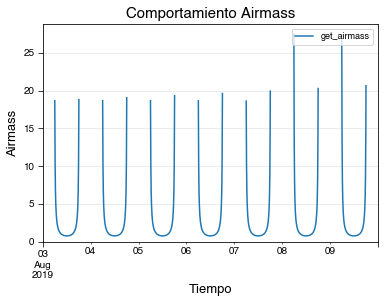

In [31]:
airmass = location.get_airmass(times=meteocontrolDB.index, 
                               solar_position=solpos, 
                               model='kastenyoung1989')

airmass['airmass_absolute'][a:b].plot(label='get_airmass')

plot_specs(title='Comportamiento Airmass',
           ylabel='Airmass',
           xlabel='Tiempo',
           rot=None, 
           ylim_min=0, ylim_max=None, 
           xlim_min=None, xlim_max=None, 
           loc='upper right')

### 8.3. DNI Extraterrestre

Muchos algoritmos de energía solar comienzan con la irradiancia incidente en la parte superior de la atmósfera de la Tierra, a menudo conocida como radiación extraterrestre. ```PVLIB-Python``` tiene cuatro algoritmos diferentes para calcular el ciclo anual de la radiación extraterrestre dada la constante solar.

Por defecto, el método es **Spencer**. Sin embargo, se utiliza **NREL** por ser más preciso y computacionalmente eficiente [10].

El usuario también puede controlar la constante solar. La literatura reciente sugiere que la constante solar es $1361 \: W / m ^ 2$ en lugar de los $1367 \: W / m ^ 2$ comúnmente aceptados.

**Los métodos PyEphem y NREL son los más precisos**. No obstante, la diferencia entre ellos y el método de Spencer (por defecto) es tan solo $\pm \: 2 \: W/m^2$ (máximo) durante todo el año. La diferencia entre PyEphem y NREL es despreciable.

---

[10] W. Holmgren (2018). irradiance.py tutorial, notebook.community, , University of Arizona. [online]. Retrieved from: https://notebook.community/rubennj/pvlib-python/docs/tutorials/irradiance.

---

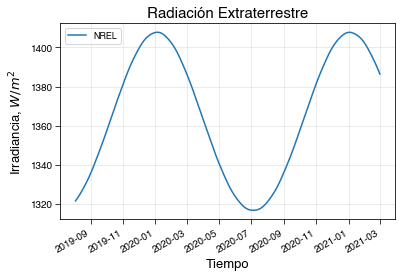

In [32]:
etr_nrel = irradiance.get_extra_radiation(datetime_or_doy=meteocontrolDB.index, 
                                          method='NREL', 
                                          solar_constant=1361)

etr_nrel.plot(label='NREL')

plot_specs(title='Radiación Extraterrestre',
           ylabel='Irradiancia, $W/m^2$',
           xlabel='Tiempo',
           rot=30, 
           ylim_min=None, ylim_max=None, 
           xlim_min=None, xlim_max=None, 
           loc='best')

### 8.4. Modelo Descomposición: DISC

El algoritmo DISC convierte la GHI en DNI a través de relaciones empíricas entre GHI e índices de claridad $K_t$. 

De acuerdo con la documentación de PVlib, el texto original que describe el modelo DISC utiliza la masa de aire relativa en lugar de la masa de aire absoluta ---i.e. corregida por presión [11]. Sin embargo, la implementación NREL del modelo DISC usa masa de aire absoluta.

La estimación del parámetro DHI se realiza mediante la siguiente ecuación:

$$
DHI = GHI - DNI \cdot cos(\theta_z)
$$

Siendo $\theta_z$ el ángulo cenit.

**Info:** https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.irradiance.disc.html#pvlib.irradiance.disc.

---

[11] Maxwell, E. L. (1987). A Quasi-Physical Model for Converting Hourly Global Horizontal to Direct Normal Insolation, Technical Report No. SERI/TR-215-3087, Golden, CO: Solar Energy Research Institute, 1987.

---

In [33]:
disc = pvlib.irradiance.disc(ghi=meteocontrolDB.ghi, 
                             solar_zenith=solpos.zenith, 
                             datetime_or_doy=meteocontrolDB.index, 
                             pressure=None, #Absolute Airmass: 101325, Relative Airmass: None 
                             min_cos_zenith=0.065, 
                             max_zenith=87, #80
                             max_airmass=12) #Max airmass value to allow in Kt calc; value 12 comes from original paper.

disc['dhi'] = meteocontrolDB.ghi - disc.dni*np.cos(np.radians(solpos.zenith))

disc.head()

,dni,kt,airmass,dhi
Datetime,,,,
2019-08-03 00:00:00-05:00,0.0,0.0,NaN,0.0
2019-08-03 00:05:00-05:00,0.0,0.0,NaN,0.0
2019-08-03 00:10:00-05:00,0.0,0.0,NaN,0.0
2019-08-03 00:15:00-05:00,0.0,0.0,NaN,0.0
2019-08-03 00:20:00-05:00,0.0,0.0,NaN,0.0


### 8.5. Modelo Transposición: Perez-Ineichen 1990 <span style='color:White'>code:19</span>

Determinan la **irradiancia difusa del cielo** en una superficie inclinada utilizando el ángulo de inclinación de la superficie, el ángulo de azimut de la superficie, la DHI, la DNI, la irradiancia extraterrestre, el ángulo cenital del sol, el sol ángulo de acimut y masa de aire relativa ---i.e. no corregida por presión.

**Info:** https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.irradiance.perez.html#pvlib.irradiance.perez.
<br><br>
La función ```irradiance.get_total_irradiance``` permite determinar la irradiancia POA a partir de los componentes difusos ---i.e. cielo difuso (sky diffuse) y suelo difuso (ground diffuse)--- y la DNI.

$$
I_{POA} = I_{POA_{direct}} + I_{POA_{sky\:diff}} + I_{POA_{ground\:diff}}
$$


**Info:** https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.irradiance.get_total_irradiance.html#pvlib.irradiance.get_total_irradiance.

---

[12] R. Perez, P. Ineichen, R. Seals, J. Michalsky & R. Stewart (1990). Modeling daylight availability and irradiance components from direct and global irradiance. Solar Energy 44 (5), 271-289.

---

In [34]:
#Albedo
surface_albedo = irradiance.SURFACE_ALBEDOS['urban'] #Check surfaces albedo with print(irradiance.SURFACE_ALBEDOS.items())

#POA irradiance
poa_perez = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                            surface_azimuth=surface_azimuth, 
                                            solar_zenith=solpos.zenith, 
                                            solar_azimuth=solpos.azimuth, 
                                            dni=disc.dni, 
                                            ghi=meteocontrolDB.ghi, 
                                            dhi=disc.dhi, 
                                            dni_extra=etr_nrel, 
                                            airmass=airmass.airmass_relative, 
                                            albedo=surface_albedo, 
                                            surface_type='urban', 
                                            model='perez', 
                                            model_perez='allsitescomposite1990')

poa_perez.head()

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
Datetime,,,,,
2019-08-03 00:00:00-05:00,0.0,-0.0,0.0,0.0,0.0
2019-08-03 00:05:00-05:00,0.0,-0.0,0.0,0.0,0.0
2019-08-03 00:10:00-05:00,0.0,-0.0,0.0,0.0,0.0
2019-08-03 00:15:00-05:00,0.0,-0.0,0.0,0.0,0.0
2019-08-03 00:20:00-05:00,0.0,-0.0,0.0,0.0,0.0


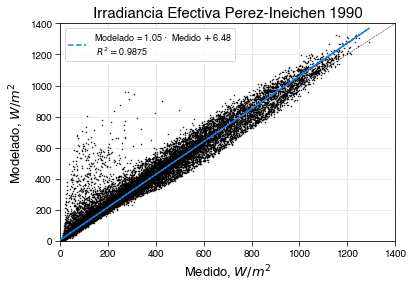

R2:  0.9875
RMSE:  3.35
MAPE:  9.4


In [35]:
#Measured and modeled POA dataframe
irrads = pd.DataFrame({'effective_irrad': meteocontrolDB.effective_irrad[start:end], 
                       'poa_global': poa_perez['poa_global'][start:end]})

irrads = irrads.dropna()
 
#Least Squares Linear Regression
x_value = irrads.effective_irrad
y_value = irrads.poa_global

coef = np.polyfit(x_value, y_value, 1)
poly1d_fn = np.poly1d(coef)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

#Figure
axis_lim = 1400

x = np.linspace(0, axis_lim, axis_lim)
y_reg = slope*x + intercept
plt.figure()
plt.plot(x_value, 
         poly1d_fn(x_value), 
         '--k',
         label=(f'Modelado = ' + f'{slope.round(2)} $· \:$ Medido $+ \:$' + f'{intercept.round(2)} \n $R^2 = $' 
                + f'{r_value.round(4)}'), color='#1580E4', linewidth=1.5, zorder = 10)

plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

y = x
plt.plot(x, y, '--', color='#222020', linewidth=0.5)

plot_specs(title='Irradiancia Efectiva Perez-Ineichen 1990',
          ylabel='Modelado, $W/m^2$',
          xlabel='Medido, $W/m^2$',
          rot=0, 
          ylim_min=0, ylim_max=axis_lim, 
          xlim_min=0, xlim_max=axis_lim, 
          loc='best')
plt.show()

#METRICS
metrics(r2=r_value, measured=x_value, modeled=y_value, store=False)

### 8.6. Simulación Modelo

In [36]:
kilo = 1000

model = 'PVlib'

#Reset Metrics
list_r2 = []
list_rmse = []
list_mape = []

#DC Production
dc_A, dc_B = pvlib_dc_production(effective_irradiance=poa_perez['poa_global'][start:end],
                                 module_temperature=meteocontrolDB.module_temp[start:end])

#Losses
dc_A, dc_B = losses(dc_A=dc_A, dc_B=dc_B)

#AC Production
pvlib_ac = pvlib_ac_power(dc_A=dc_A, dc_B=dc_B)

#Energy
pvl_day_energy, pvl_week_energy, pvl_month_energy, pvl_ee = energy(ACPow=pvlib_ac, res=res, shorten=True)

R2:  0.9803
RMSE:  4.15
MAPE:  5.1


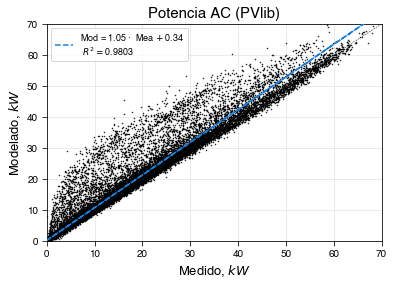

In [37]:
ac = meteocontrolDB.ac_A + meteocontrolDB.ac_B

#Least Squares Linear Regression
x_value = ac[start:end]/kilo
y_value = pvlib_ac/kilo

ac = pd.DataFrame({'measured': x_value, 
                   'modeled': y_value})

ac = ac.dropna()

x_value = ac.measured
y_value = ac.modeled

coef = np.polyfit(x_value, y_value, 1)
poly1d_fn = np.poly1d(coef)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

#Figure
axis_lim = 70

x = np.linspace(0, axis_lim, axis_lim)
y_reg = slope*x + intercept

plt.plot(x_value, 
         poly1d_fn(x_value), 
         '--k',
         label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
               + f"{r_value.round(4)}"), 
         color='#1580E4', linewidth=1.5, zorder = 10)

plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

y = x
plt.plot(x, y, '--', color='#222020', linewidth=0.5)

plot_specs(title=f'Potencia AC ({model})',
           ylabel='Modelado, $kW$',
           xlabel='Medido, $kW$',
           rot=0, 
           ylim_min=0, ylim_max=axis_lim, 
           xlim_min=0, xlim_max=axis_lim, 
           loc='best')

#METRICS
metrics(r2=r_value, measured=x_value, modeled=y_value, store=True)

## 9. Modelado de Producción Planta FV: PVWatts

<img src='pvwatts_nrel.png' width='500' height='500' />

### 9.1. Simulación Modelo

In [38]:
kilo = 1000

model = 'PVWatts'

#DC Production
dc_A, dc_B = pvwatts_dc_production(effective_irradiance=poa_perez['poa_global'][start:end], 
                                   module_temperature=meteocontrolDB.module_temp[start:end], 
                                   loss=26.9/100)

#AC Production
pvwatts_ac = pvwatts_ac_power(dc_A=dc_A, dc_B=dc_B)

#Energy
pvw_day_energy, pvw_week_energy, pvw_month_energy, pvw_ee = energy(ACPow=pvwatts_ac, res=res, shorten=True)

R2:  0.9805
RMSE:  4.12
MAPE:  5.07


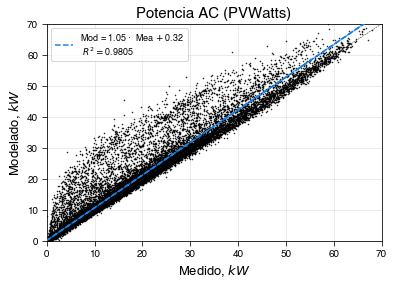

In [39]:
ac = meteocontrolDB.ac_A + meteocontrolDB.ac_B

#Least Squares Linear Regression
x_value = ac[start:end]/kilo
y_value = pvwatts_ac/kilo

ac = pd.DataFrame({'measured': x_value, 
                   'modeled': y_value})

ac = ac.dropna()

x_value = ac.measured
y_value = ac.modeled

coef = np.polyfit(x_value, y_value, 1)
poly1d_fn = np.poly1d(coef)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

#Figure
axis_lim = 70

x = np.linspace(0, axis_lim, axis_lim)
y_reg = slope*x + intercept

plt.plot(x_value, 
         poly1d_fn(x_value), 
         '--k',
         label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
               + f"{r_value.round(4)}"), 
         color='#1580E4', linewidth=1.5, zorder = 10)

plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

y = x
plt.plot(x, y, '--', color='#222020', linewidth=0.5)

plot_specs(title=f'Potencia AC ({model})',
           ylabel='Modelado, $kW$',
           xlabel='Medido, $kW$',
           rot=0, 
           ylim_min=0, ylim_max=axis_lim, 
           xlim_min=0, xlim_max=axis_lim, 
           loc='best')

#METRICS
metrics(r2=r_value, measured=x_value, modeled=y_value, store=True)

## 10. Modelado de Producción Planta FV: PVsyst

<img src='pvsyst.png' width='350' height='350' />

### 10.1. Simulación Modelo

In [40]:
kilo = 1000

model = 'PVsyst'

#DC Production
dc_A, dc_B = pvsyst_dc_production(effective_irradiance=poa_perez['poa_global'][start:end],
                                  module_temperature=meteocontrolDB.module_temp[start:end])

#Losses
dc_A, dc_B = losses(dc_A=dc_A, dc_B=dc_B)

#AC Production
pvsyst_ac = pvlib_ac_power(dc_A=dc_A, dc_B=dc_B)

pvs_day_energy, pvs_week_energy, pvs_month_energy, pvs_ee = energy(ACPow=pvsyst_ac, res=res, shorten=True)

R2:  0.9807
RMSE:  4.61
MAPE:  6.62


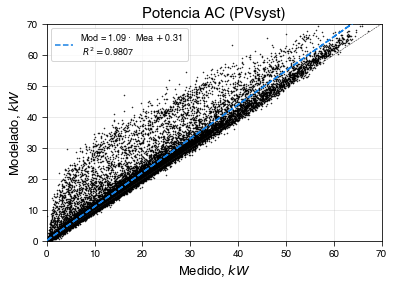

In [41]:
ac = meteocontrolDB.ac_A + meteocontrolDB.ac_B

#Least Squares Linear Regression
x_value = ac[start:end]/kilo
y_value = pvsyst_ac/kilo

ac = pd.DataFrame({'measured': x_value, 
                   'modeled': y_value})

ac = ac.dropna()

x_value = ac.measured
y_value = ac.modeled

coef = np.polyfit(x_value, y_value, 1)
poly1d_fn = np.poly1d(coef)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

#Figure
axis_lim = 70

x = np.linspace(0, axis_lim, axis_lim)
y_reg = slope*x + intercept

plt.plot(x_value, 
         poly1d_fn(x_value), 
         '--k',
         label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
               + f"{r_value.round(4)}"), 
         color='#1580E4', linewidth=1.5, zorder = 10)

plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

y = x
plt.plot(x, y, '--', color='#222020', linewidth=0.5)

plot_specs(title=f'Potencia AC ({model})',
           ylabel='Modelado, $kW$',
           xlabel='Medido, $kW$',
           rot=0, 
           ylim_min=0, ylim_max=axis_lim, 
           xlim_min=0, xlim_max=axis_lim, 
           loc='best')

#METRICS
metrics(r2=r_value, measured=x_value, modeled=y_value, store=True)

## 11. Comparación de Modelos

### 11.1. Métricas Estadísticas: Potencia AC <span style='color:White'>code:20</span>

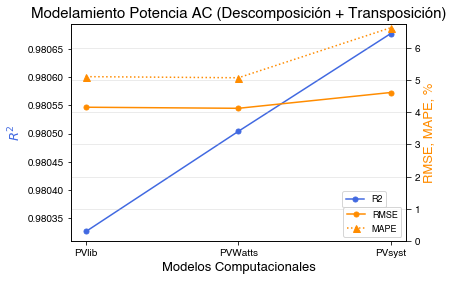

In [42]:
full_models = ['PVlib', 'PVWatts', 'PVsyst']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(full_models, list_r2, color='royalblue', ls='-', marker='o', ms=5, label='R2')
ax2.plot(full_models, list_rmse, color='darkorange', ls='-', marker='o', ms=5, label='RMSE')
ax2.plot(full_models, list_mape, color='darkorange', ls='dotted', marker='^', ms=7, label='MAPE')

ax1.set_xlabel('Modelos Computacionales', fontname="Helvetica", fontsize=13)
ax1.set_ylabel('$R^2$', fontname="Helvetica", fontsize=13, color='royalblue')
ax2.set_ylabel('RMSE, MAPE', fontname="Helvetica", fontsize=13, color='darkorange')

plt.rc('font', family='Helvetica')
plt.rcParams['axes.axisbelow'] = True;

plt.title('Modelamiento Potencia AC (Descomposición + Transposición)', fontname="Helvetica", fontsize=15);
plt.ylabel('RMSE, MAPE, %', fontname="Helvetica", fontsize=13);
#plt.xlabel('Medido, $W/m^2$', fontname="Helvetica", fontsize=13);

plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.xlim(None, None)
plt.ylim(0, None)
plt.grid(True);
plt.legend(loc='lower right', fontsize=9);
ax1.legend(loc=(0.81, 0.155), fontsize=9);
plt.tight_layout;

### 11.2. Energía Diaria

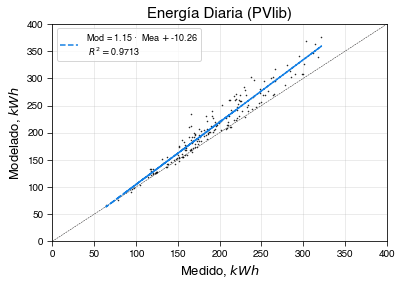

PVlib
R2:  0.9713
RMSE:  7.6
MAPE:  6.92




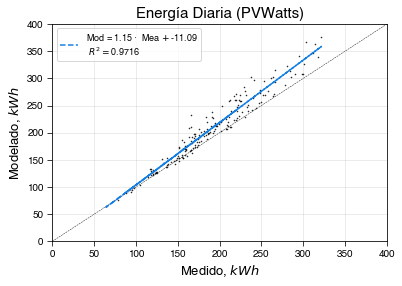

PVWatts
R2:  0.9716
RMSE:  7.44
MAPE:  6.6




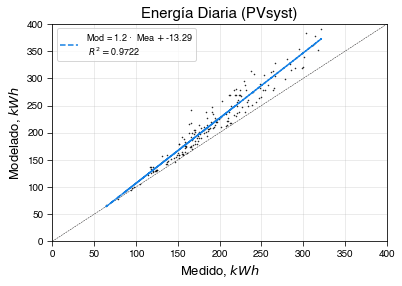

PVsyst
R2:  0.9722
RMSE:  9.61
MAPE:  9.93




In [43]:
for i in full_models:
    if i == 'PVlib':
        x_value = pvl_day_energy.measured
        y_value = pvl_day_energy.simulated
        ee = pvl_ee['day']
    
    elif i == 'PVWatts':
        x_value = pvw_day_energy.measured
        y_value = pvw_day_energy.simulated
        ee = pvw_ee['day']
    
    else:
        x_value = pvs_day_energy.measured
        y_value = pvs_day_energy.simulated
        ee = pvs_ee['day']
    
    #Figure
    plt.figure()

    #Least Squares Linear Regression
    coef = np.polyfit(x_value, y_value, 1)
    poly1d_fn = np.poly1d(coef)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

    #Figure
    axis_lim = 400

    x = np.linspace(0, axis_lim, axis_lim)
    y_reg = slope*x + intercept

    plt.plot(x_value, 
             poly1d_fn(x_value), 
             '--k',
             label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
                   + f"{r_value.round(4)}"), 
             color='#1580E4', linewidth=1.5, zorder = 10)

    plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

    y = x
    plt.plot(x, y, '--', color='#222020', linewidth=0.5)

    plot_specs(title=f'Energía Diaria ({i})',
               ylabel='Modelado, $kWh$',
               xlabel='Medido, $kWh$',
               rot=0, 
               ylim_min=0, ylim_max=axis_lim, 
               xlim_min=0, xlim_max=axis_lim, 
               loc='best')
    
    plt.show()
    
    #Metrics
    print(i)
    print('R2: ', r_value.round(4))

    metrics_data = pd.DataFrame({'effective_irrad': x_value, 
                                 'poa': y_value})

    y_true = metrics_data.effective_irrad
    y_pred = metrics_data.poa

    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    rmse = (rmse/np.max(y_true))*100
    print('RMSE: ', np.round(rmse, 2))

    '''
    MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
    '''
    ee = ee.loc[ee.energy != 0]

    print('MAPE: ', np.round(ee['perc_error'].median(), 2))
    print('\n')

### 11.3. Energía Semanal

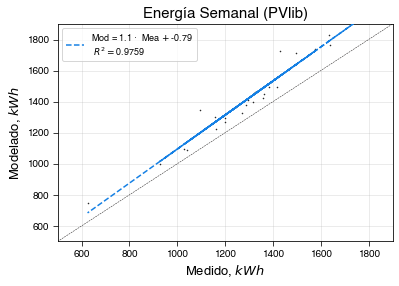

PVlib
R2:  0.9759
RMSE:  7.88
MAPE:  7.7




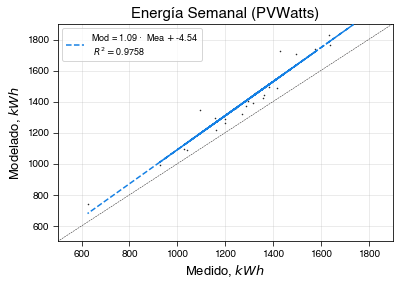

PVWatts
R2:  0.9758
RMSE:  7.64
MAPE:  7.43




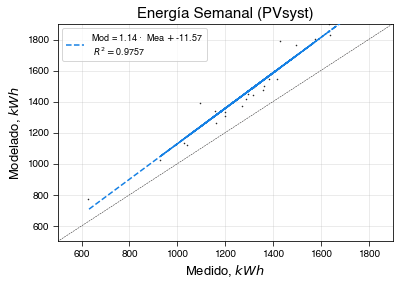

PVsyst
R2:  0.9757
RMSE:  10.5
MAPE:  10.73




In [44]:
for i in full_models:
    if i == 'PVlib':
        x_value = pvl_week_energy.measured
        y_value = pvl_week_energy.simulated
        ee = pvl_ee['week']
    
    elif i == 'PVWatts':
        x_value = pvw_week_energy.measured
        y_value = pvw_week_energy.simulated
        ee = pvw_ee['week']
    
    else:
        x_value = pvs_week_energy.measured
        y_value = pvs_week_energy.simulated
        ee = pvs_ee['week']
    
    #Figure
    plt.figure()

    #Least Squares Linear Regression
    coef = np.polyfit(x_value, y_value, 1)
    poly1d_fn = np.poly1d(coef)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

    #Figure
    axis_lim = 1900

    x = np.linspace(0, axis_lim, axis_lim)
    y_reg = slope*x + intercept

    plt.plot(x_value, 
             poly1d_fn(x_value), 
             '--k',
             label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
                   + f"{r_value.round(4)}"), 
             color='#1580E4', linewidth=1.5, zorder = 10)

    plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

    y = x
    plt.plot(x, y, '--', color='#222020', linewidth=0.5)

    plot_specs(title=f'Energía Semanal ({i})',
               ylabel='Modelado, $kWh$',
               xlabel='Medido, $kWh$',
               rot=0, 
               ylim_min=500, ylim_max=axis_lim, 
               xlim_min=500, xlim_max=axis_lim, 
               loc='best')
    
    plt.show()
    
    #Metrics
    print(i)
    print('R2: ', r_value.round(4))

    metrics_data = pd.DataFrame({'effective_irrad': x_value, 
                                 'poa': y_value})

    y_true = metrics_data.effective_irrad
    y_pred = metrics_data.poa

    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    rmse = (rmse/np.max(y_true))*100
    print('RMSE: ', np.round(rmse, 2))

    '''
    MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
    '''
    ee = ee.loc[ee.energy != 0]

    print('MAPE: ', np.round(ee['perc_error'].median(), 2))
    print('\n')

### 11.4. Energía Mensual <span style='color:White'>code:21</span>

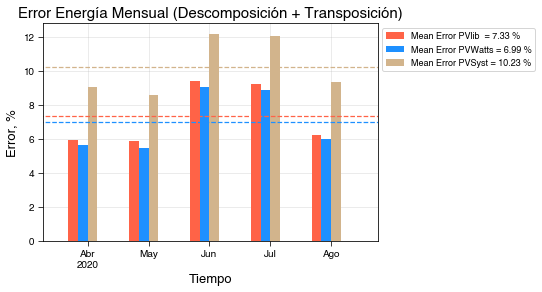

In [45]:
#Energy Error Comparison Plot
bar_width = 0.08
width = bar_width*2

months = ['Abr\n2020', 'May', 'Jun', 'Jul', 'Ago']

x = np.arange(len(months))

r1 = np.arange(len(months))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

#Mean Error Values
pvlib_meanerror = round(pvl_ee['month']['perc_error'][0:5].mean(), 2)
pvwatts_meanerror = round(pvw_ee['month']['perc_error'][0:5].mean(), 2)
pvsyst_meanerror = round(pvs_ee['month']['perc_error'][0:5].mean(), 2)

#Bar Plots
hor, ver = 13, 5
#plt.figure(figsize=(hor,ver))

plt.bar(r1, pvl_ee['month']['perc_error'][0:5], width, 
        label='Mean Error PVlib  = ' + f'{pvlib_meanerror}' + ' %', color='tomato', linewidth=2)

plt.bar(r3, pvw_ee['month']['perc_error'][0:5], width, 
        label='Mean Error PVWatts = ' + f'{pvwatts_meanerror}' + ' %', color='dodgerblue', linewidth=2)

plt.bar(r5, pvs_ee['month']['perc_error'][0:5], width, 
        label='Mean Error PVSyst = ' + f'{pvsyst_meanerror}' + ' %', color='tan', linewidth=2)

#Horizontal Lines
plt.hlines(y=0, xmin=-1, xmax=x[-1]+1, colors='black', linestyles='solid', linewidth=0.5) #Zero
plt.hlines(y=pvlib_meanerror, xmin=-1, xmax=x[-1]+1, colors='tomato', linestyles='--', linewidth=1.25)
plt.hlines(y=pvwatts_meanerror, xmin=-1, xmax=x[-1]+1, colors='dodgerblue', linestyles='--', linewidth=1.25)
plt.hlines(y=pvsyst_meanerror, xmin=-1, xmax=x[-1]+1, colors='tan', linestyles='--', linewidth=1.25)

plt.xticks(r4, months)
plot_specs(title='Error Energía Mensual (Descomposición + Transposición)',
           ylabel='Error, %',
           xlabel='Tiempo',
           rot=0, 
           ylim_min=0, ylim_max=None, 
           xlim_min=-0.5, xlim_max=5, 
           loc='best')
plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize=9);

### 11.5 Relación Recurso-Potencia

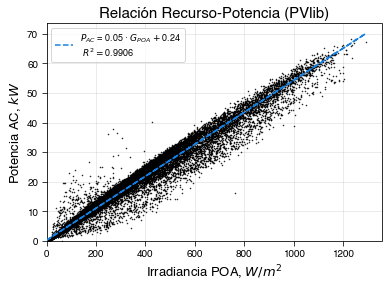

In [46]:
ac = meteocontrolDB.ac_A + meteocontrolDB.ac_B

#Least Squares Linear Regression
y_value = ac[start:end]/kilo
x_value = meteocontrolDB.effective_irrad[start:end]

ac = pd.DataFrame({'measured': x_value, 
                   'modeled': y_value})

ac = ac.dropna()

x_value = ac.measured
y_value = ac.modeled

coef = np.polyfit(x_value, y_value, 1)
poly1d_fn = np.poly1d(coef)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

#Figure
plt.plot(x_value, 
         poly1d_fn(x_value), 
         '--k',
         label=('$P_{AC}$ = ' + f'{slope.round(2)} $· \:$' + '$G_{POA}$ $+ \:$' + f'{intercept.round(2)} \n $R^2 = $' 
               + f'{r_value.round(4)}'), 
         color='#1580E4', linewidth=1.5, zorder = 10)

plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

plot_specs(title=f'Relación Recurso-Potencia (PVlib)',
           ylabel='Potencia AC, $kW$',
           xlabel='Irradiancia POA, $W/m^2$',
           rot=0, 
           ylim_min=0, ylim_max=None, 
           xlim_min=0, xlim_max=None, 
           loc='best')

## Modelo 3: Datos Simulados (Descomposición + Transposición Dataset Completo) <span style='color:White'>code:22</span>

## 12. Modelado de Producción Planta FV: PVlib

<img src='pvlib_snl.png' width='500' height='500' />

### 12.1. Simulación Modelo

In [47]:
kilo = 1000

model = 'PVlib'

#Reset Metrics
list_r2 = []
list_rmse = []
list_mape = []

#DC Production
dc_A, dc_B = pvlib_dc_production(effective_irradiance=poa_perez['poa_global'],
                                 module_temperature=meteocontrolDB.module_temp)

#Losses
dc_A, dc_B = losses(dc_A=dc_A, dc_B=dc_B)

#AC Production
pvlib_ac = pvlib_ac_power(dc_A=dc_A, dc_B=dc_B)

#Energy
pvl_day_energy, pvl_week_energy, pvl_month_energy, pvl_ee = energy(ACPow=pvlib_ac, res=res, shorten=False)

R2:  0.9614
RMSE:  5.12
MAPE:  18.3


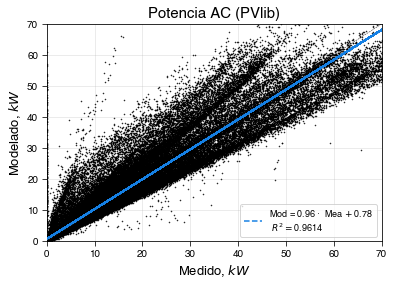

In [48]:
ac = meteocontrolDB.ac_A + meteocontrolDB.ac_B

#Least Squares Linear Regression
x_value = ac/kilo
y_value = pvlib_ac/kilo

ac = pd.DataFrame({'measured': x_value, 
                   'modeled': y_value})

ac = ac.dropna()

x_value = ac.measured
y_value = ac.modeled

coef = np.polyfit(x_value, y_value, 1)
poly1d_fn = np.poly1d(coef)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

#Figure
axis_lim = 70

x = np.linspace(0, axis_lim, axis_lim)
y_reg = slope*x + intercept

plt.plot(x_value, 
         poly1d_fn(x_value), 
         '--k',
         label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
               + f"{r_value.round(4)}"), 
         color='#1580E4', linewidth=1.5, zorder = 10)

plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

y = x
plt.plot(x, y, '--', color='#222020', linewidth=0.5)

plot_specs(title=f'Potencia AC ({model})',
           ylabel='Modelado, $kW$',
           xlabel='Medido, $kW$',
           rot=0, 
           ylim_min=0, ylim_max=axis_lim, 
           xlim_min=0, xlim_max=axis_lim, 
           loc='best')

#METRICS
metrics(r2=r_value, measured=x_value, modeled=y_value, store=True)

## 13. Modelado de Producción Planta FV: PVWatts

<img src='pvwatts_nrel.png' width='500' height='500' />

### 13.1. Simulación Modelo

In [49]:
kilo = 1000

model = 'PVWatts'

#DC Production
dc_A, dc_B = pvwatts_dc_production(effective_irradiance=poa_perez['poa_global'], 
                                   module_temperature=meteocontrolDB.module_temp, 
                                   loss=26.9/100)

#AC Production
pvwatts_ac = pvwatts_ac_power(dc_A=dc_A, dc_B=dc_B)

#Energy
pvw_day_energy, pvw_week_energy, pvw_month_energy, pvw_ee = energy(ACPow=pvwatts_ac, res=res, shorten=False)

R2:  0.9616
RMSE:  5.11
MAPE:  18.51


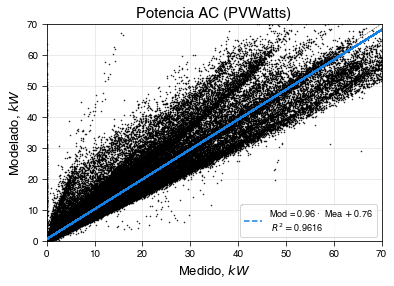

In [50]:
ac = meteocontrolDB.ac_A + meteocontrolDB.ac_B

#Least Squares Linear Regression
x_value = ac/kilo
y_value = pvwatts_ac/kilo

ac = pd.DataFrame({'measured': x_value, 
                   'modeled': y_value})

ac = ac.dropna()

x_value = ac.measured
y_value = ac.modeled

coef = np.polyfit(x_value, y_value, 1)
poly1d_fn = np.poly1d(coef)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

#Figure
axis_lim = 70

x = np.linspace(0, axis_lim, axis_lim)
y_reg = slope*x + intercept

plt.plot(x_value, 
         poly1d_fn(x_value), 
         '--k',
         label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
               + f"{r_value.round(4)}"), 
         color='#1580E4', linewidth=1.5, zorder = 10)

plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

y = x
plt.plot(x, y, '--', color='#222020', linewidth=0.5)

plot_specs(title=f'Potencia AC ({model})',
           ylabel='Modelado, $kW$',
           xlabel='Medido, $kW$',
           rot=0, 
           ylim_min=0, ylim_max=axis_lim, 
           xlim_min=0, xlim_max=axis_lim, 
           loc='best')

#METRICS
metrics(r2=r_value, measured=x_value, modeled=y_value, store=True)

## 14. Modelado de Producción Planta FV: PVsyst

<img src='pvsyst.png' width='350' height='350' />

### 14.1. Simulación Modelo

In [51]:
kilo = 1000

model = 'PVsyst'

#DC Production
dc_A, dc_B = pvsyst_dc_production(effective_irradiance=poa_perez['poa_global'],
                                  module_temperature=meteocontrolDB.module_temp)

#Losses
dc_A, dc_B = losses(dc_A=dc_A, dc_B=dc_B)

#AC Production
pvsyst_ac = pvlib_ac_power(dc_A=dc_A, dc_B=dc_B)

pvs_day_energy, pvs_week_energy, pvs_month_energy, pvs_ee = energy(ACPow=pvsyst_ac, res=res, shorten=False)

R2:  0.9619
RMSE:  5.3
MAPE:  17.41


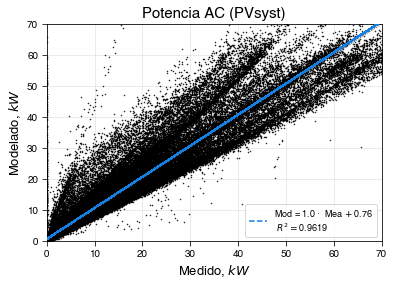

In [52]:
ac = meteocontrolDB.ac_A + meteocontrolDB.ac_B

#Least Squares Linear Regression
x_value = ac/kilo
y_value = pvsyst_ac/kilo

ac = pd.DataFrame({'measured': x_value, 
                   'modeled': y_value})

ac = ac.dropna()

x_value = ac.measured
y_value = ac.modeled

coef = np.polyfit(x_value, y_value, 1)
poly1d_fn = np.poly1d(coef)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

#Figure
axis_lim = 70

x = np.linspace(0, axis_lim, axis_lim)
y_reg = slope*x + intercept

plt.plot(x_value, 
         poly1d_fn(x_value), 
         '--k',
         label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
               + f"{r_value.round(4)}"), 
         color='#1580E4', linewidth=1.5, zorder = 10)

plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

y = x
plt.plot(x, y, '--', color='#222020', linewidth=0.5)

plot_specs(title=f'Potencia AC ({model})',
           ylabel='Modelado, $kW$',
           xlabel='Medido, $kW$',
           rot=0, 
           ylim_min=0, ylim_max=axis_lim, 
           xlim_min=0, xlim_max=axis_lim, 
           loc='best')

#METRICS
metrics(r2=r_value, measured=x_value, modeled=y_value, store=True)

## 15. Comparación de Modelos

### 15.1. Métricas Estadísticas: Potencia AC

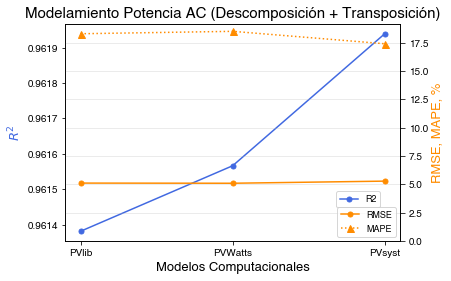

In [53]:
full_models = ['PVlib', 'PVWatts', 'PVsyst']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(full_models, list_r2, color='royalblue', ls='-', marker='o', ms=5, label='R2')
ax2.plot(full_models, list_rmse, color='darkorange', ls='-', marker='o', ms=5, label='RMSE')
ax2.plot(full_models, list_mape, color='darkorange', ls='dotted', marker='^', ms=7, label='MAPE')

ax1.set_xlabel('Modelos Computacionales', fontname="Helvetica", fontsize=13)
ax1.set_ylabel('$R^2$', fontname="Helvetica", fontsize=13, color='royalblue')
ax2.set_ylabel('RMSE, MAPE', fontname="Helvetica", fontsize=13, color='darkorange')

plt.rc('font', family='Helvetica')
plt.rcParams['axes.axisbelow'] = True;

plt.title('Modelamiento Potencia AC (Descomposición + Transposición)', fontname="Helvetica", fontsize=15);
plt.ylabel('RMSE, MAPE, %', fontname="Helvetica", fontsize=13);
#plt.xlabel('Medido, $W/m^2$', fontname="Helvetica", fontsize=13);

plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.xlim(None, None)
plt.ylim(0, None)
plt.grid(True);
plt.legend(loc='lower right', fontsize=9);
ax1.legend(loc=(0.81, 0.155), fontsize=9);
plt.tight_layout;

### 15.2. Energía Diaria

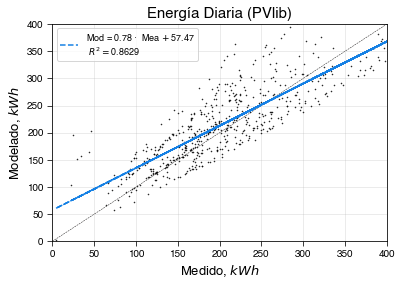

PVlib
R2:  0.8629
RMSE:  9.24
MAPE:  14.79




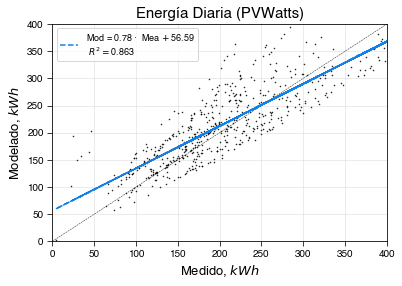

PVWatts
R2:  0.863
RMSE:  9.21
MAPE:  14.78




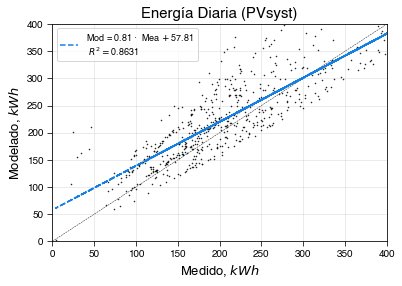

PVsyst
R2:  0.8631
RMSE:  9.8
MAPE:  14.12




In [54]:
for i in full_models:
    if i == 'PVlib':
        pvl_day_energy = pvl_day_energy.dropna()
        x_value = pvl_day_energy.measured
        y_value = pvl_day_energy.simulated
        ee = pvl_ee['day']
    
    elif i == 'PVWatts':
        pvw_day_energy = pvw_day_energy.dropna()
        x_value = pvw_day_energy.measured
        y_value = pvw_day_energy.simulated
        ee = pvw_ee['day']
    
    else:
        pvs_day_energy = pvs_day_energy.dropna()
        x_value = pvs_day_energy.measured
        y_value = pvs_day_energy.simulated
        ee = pvs_ee['day']
    
    #Figure
    plt.figure()

    #Least Squares Linear Regression
    coef = np.polyfit(x_value, y_value, 1)
    poly1d_fn = np.poly1d(coef)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

    #Figure
    axis_lim = 400

    x = np.linspace(0, axis_lim, axis_lim)
    y_reg = slope*x + intercept

    plt.plot(x_value, 
             poly1d_fn(x_value), 
             '--k',
             label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
                   + f"{r_value.round(4)}"), 
             color='#1580E4', linewidth=1.5, zorder = 10)

    plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

    y = x
    plt.plot(x, y, '--', color='#222020', linewidth=0.5)

    plot_specs(title=f'Energía Diaria ({i})',
               ylabel='Modelado, $kWh$',
               xlabel='Medido, $kWh$',
               rot=0, 
               ylim_min=0, ylim_max=axis_lim, 
               xlim_min=0, xlim_max=axis_lim, 
               loc='best')
    
    plt.show()
    
    #Metrics
    print(i)
    print('R2: ', r_value.round(4))

    metrics_data = pd.DataFrame({'effective_irrad': x_value, 
                                 'poa': y_value})

    y_true = metrics_data.effective_irrad
    y_pred = metrics_data.poa

    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    rmse = (rmse/np.max(y_true))*100
    print('RMSE: ', np.round(rmse, 2))

    '''
    MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
    '''
    ee = ee.loc[ee.energy != 0]

    print('MAPE: ', np.round(ee['perc_error'].median(), 2))
    print('\n')

### 15.3. Energía Semanal

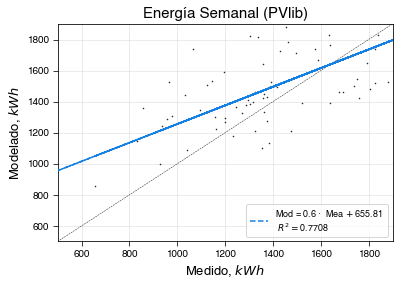

PVlib
R2:  0.7708
RMSE:  10.57
MAPE:  12.76




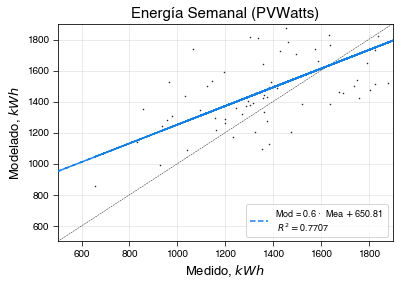

PVWatts
R2:  0.7707
RMSE:  10.54
MAPE:  12.98




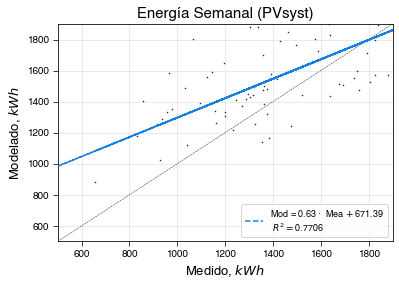

PVsyst
R2:  0.7706
RMSE:  11.26
MAPE:  12.23




In [55]:
for i in full_models:
    if i == 'PVlib':
        x_value = pvl_week_energy.measured
        y_value = pvl_week_energy.simulated
        ee = pvl_ee['week']
    
    elif i == 'PVWatts':
        x_value = pvw_week_energy.measured
        y_value = pvw_week_energy.simulated
        ee = pvw_ee['week']
    
    else:
        x_value = pvs_week_energy.measured
        y_value = pvs_week_energy.simulated
        ee = pvs_ee['week']
    
    #Figure
    plt.figure()

    #Least Squares Linear Regression
    coef = np.polyfit(x_value, y_value, 1)
    poly1d_fn = np.poly1d(coef)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

    #Figure
    axis_lim = 1900

    x = np.linspace(0, axis_lim, axis_lim)
    y_reg = slope*x + intercept

    plt.plot(x_value, 
             poly1d_fn(x_value), 
             '--k',
             label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
                   + f"{r_value.round(4)}"), 
             color='#1580E4', linewidth=1.5, zorder = 10)

    plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

    y = x
    plt.plot(x, y, '--', color='#222020', linewidth=0.5)

    plot_specs(title=f'Energía Semanal ({i})',
               ylabel='Modelado, $kWh$',
               xlabel='Medido, $kWh$',
               rot=0, 
               ylim_min=500, ylim_max=axis_lim, 
               xlim_min=500, xlim_max=axis_lim, 
               loc='best')
    
    plt.show()
    
    #Metrics
    print(i)
    print('R2: ', r_value.round(4))

    metrics_data = pd.DataFrame({'effective_irrad': x_value, 
                                 'poa': y_value})

    y_true = metrics_data.effective_irrad
    y_pred = metrics_data.poa

    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    rmse = (rmse/np.max(y_true))*100
    print('RMSE: ', np.round(rmse, 2))

    '''
    MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
    '''
    ee = ee.loc[ee.energy != 0]

    print('MAPE: ', np.round(ee['perc_error'].median(), 2))
    print('\n')

### 15.4. Energía Mensual <span style='color:White'>code:23</span>

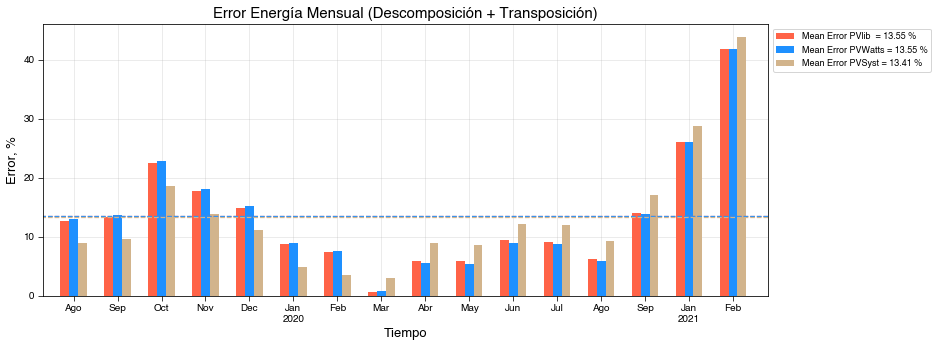

In [56]:
#Energy Error Comparison Plot
bar_width = 0.1
width = bar_width*2

months = ['Ago', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan\n2020', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 
          'Ago', 'Sep', 'Jan\n2021', 'Feb']

x = np.arange(len(months))

r1 = np.arange(len(months))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

#Mean Error Values
pvlib_meanerror = round(pvl_ee['month'].loc[pvl_ee['month'].index.isin(pvl_ee['month'].iloc[14:17].index) == False]['perc_error'].mean(), 2)
pvwatts_meanerror = round(pvw_ee['month'].loc[pvw_ee['month'].index.isin(pvw_ee['month'].iloc[14:17].index) == False]['perc_error'].mean(), 2)
pvsyst_meanerror = round(pvs_ee['month'].loc[pvs_ee['month'].index.isin(pvs_ee['month'].iloc[14:17].index) == False]['perc_error'].mean(), 2)

#Bar Plots
hor, ver = 13, 5
plt.figure(figsize=(hor,ver))

plt.bar(r1, pvl_ee['month'].loc[pvl_ee['month'].index.isin(pvl_ee['month'].iloc[14:17].index) == False]['perc_error'], width, 
        label='Mean Error PVlib  = ' + f'{pvlib_meanerror}' + ' %', color='tomato', linewidth=2)

plt.bar(r3, pvw_ee['month'].loc[pvw_ee['month'].index.isin(pvw_ee['month'].iloc[14:17].index) == False]['perc_error'], width, 
        label='Mean Error PVWatts = ' + f'{pvwatts_meanerror}' + ' %', color='dodgerblue', linewidth=2)

plt.bar(r5, pvs_ee['month'].loc[pvs_ee['month'].index.isin(pvs_ee['month'].iloc[14:17].index) == False]['perc_error'], width, 
        label='Mean Error PVSyst = ' + f'{pvsyst_meanerror}' + ' %', color='tan', linewidth=2)

#Horizontal Lines
plt.hlines(y=0, xmin=-1, xmax=x[-1]+1, colors='black', linestyles='solid', linewidth=0.5) #Zero
plt.hlines(y=pvlib_meanerror, xmin=-1, xmax=x[-1]+1, colors='tomato', linestyles='--', linewidth=1.25)
plt.hlines(y=pvwatts_meanerror, xmin=-1, xmax=x[-1]+1, colors='dodgerblue', linestyles='--', linewidth=1.25)
plt.hlines(y=pvsyst_meanerror, xmin=-1, xmax=x[-1]+1, colors='tan', linestyles='--', linewidth=1.25)

plt.xticks(r3, months)
plot_specs(title='Error Energía Mensual (Descomposición + Transposición)',
           ylabel='Error, %',
           xlabel='Tiempo',
           rot=0, 
           ylim_min=0, ylim_max=None, 
           xlim_min=-0.5, xlim_max=16, 
           loc='best')
plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize=9);

### 15.5. Relación Recurso-Potencia

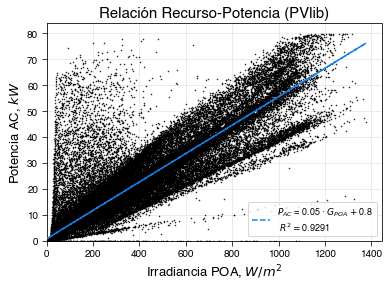

In [57]:
ac = meteocontrolDB.ac_A + meteocontrolDB.ac_B

#Least Squares Linear Regression
y_value = ac/kilo
x_value = meteocontrolDB.effective_irrad

ac = pd.DataFrame({'measured': x_value, 
                   'modeled': y_value})

ac = ac.dropna()

x_value = ac.measured
y_value = ac.modeled

coef = np.polyfit(x_value, y_value, 1)
poly1d_fn = np.poly1d(coef)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

#Figure
plt.plot(x_value, 
         poly1d_fn(x_value), 
         '--k',
         label=('$P_{AC}$ = ' + f'{slope.round(2)} $· \:$' + '$G_{POA}$ $+ \:$' + f'{intercept.round(2)} \n $R^2 = $' 
               + f'{r_value.round(4)}'), 
         color='#1580E4', linewidth=1.5, zorder = 10)

plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

plot_specs(title=f'Relación Recurso-Potencia (PVlib)',
           ylabel='Potencia AC, $kW$',
           xlabel='Irradiancia POA, $W/m^2$',
           rot=0, 
           ylim_min=0, ylim_max=None, 
           xlim_min=0, xlim_max=None, 
           loc='best')

## 16. Conclusiones <span style='color:White'>code:24</span>

En el presente cuaderno se implementan diferentes modelos computacionales que estiman la producción de una planta solar fotovoltaica a partir de los parámetros técnicos de la planta (configuración, tecnologías, tipo de seguimiento, entre otros aspectos), la irradiancia y otras variables meteorológicas.

Los modelos se validan frente a **datos monitoreados con resolución cinco-minutal** de la producción del sistema de 80 kWp de la Universidad de los Andes.

Los modelos computacionales evaluados son: 
1. PVlib desarrollado por *Sandia National Laboratories* (SNL).
2. PVWatts desarrollado por *National Renewable Energy Laboratory* (NREL).
3. PVsyst.

Y los criterios de selección de estos modelos son:
- Comparación de resultados de desempeño.
- Capacidad para modificar, personalizar y actualizar algoritmos.
- Integración automática en flujos de trabajo externos.
- Resultados intermedios y análisis estadísticos sobre la marcha.

Los estudios muestran que la mayor precisión operativa ---i.e. potencia AC y energía diaria, semanal y mensual--- se obtiene cuando la irradiancia POA es medida *in situ*. En el caso de estimar la irradiancia POA mediante la combinación de modelos de descomposición + transposición ---i.e. partiendo del GHI, las estimaciones operativas presentan un error hasta 3% mayor (según MAPE).

Por otra parte, los modelos computacionales PVWatts y PVsyst presentan desviaciones aproximadas de 1.5% (caso Modelo 1) frente a los parámetros operativos de estudio. Para los Modelos 2 y 3 la desviación prcentual aumenta por los errores añadidos de los modelos de descomposición + transposición (2.5% en promedio para los Modelos 2 y 3). 

<p style="text-align: center;"> <b>Tabla I. Métricas estadísticas para modelo computacional PVlib. </b></p>

|             |         | Potencia AC | Energía Diaria | Energía Semanal | Energía Mensual |
|-------------|---------|-------------|----------------|-----------------|-----------------|
|             | R2      | 0.991       | 0.986          | 0.984           |                 |
|**Modelo 1** | RMSE, % | 2.46        | 3.08           | 2.52            |                 |
|             | MAPE, % | 7.69        | 4.26           | 2.52            | 2.19a           |
|             |         |             |                |                 |                 |
|             | R2      | 0.980       | 0.971          | 0.975           |                 |
|**Modelo 2** | RMSE, % | 4.15        | 7.6            | 7.88            |                 |
|             | MAPE, % | 5.1         | 6.92           | 7.7             | 7.33a           |
|             |         |             |                |                 |                 |
|             | R2      | 0.961       | 0.862          | 0.770           |                 |
|**Modelo 3** | RMSE, % | 5.12        | 9.24           | 10.57           |                 |
|             | MAPE, % | 18.3        | 14.79          | 12.76           | 13.55a          |


$^a$Error promedio

Finalmente, el modelo que relaciona el recurso y la potencia en plantas solares fotovoltaicas recomendado es el modelo computacional <span style='outline:2px solid Orange; color:Peru'>**PVlib de SNL**</span>.

**¿Por qué PVlib de Sandia National Laboratories?**
> - Precisión y el rigor técnico de los modelos (IEC 61724-1).
> - Librería open-source referente de investigación.
> - Estudio detallado de componentes del sistema.

**Principales Atributos de PVlib**
> - Aprovecha el lenguaje de programación python, lo cual garantiza la flexibilidad y el libre acceso a usos académicos y comerciales.
> - Diseñado para el desarrollo colaborativo y respaldado por un método riguroso para incluir las con- tribuciones de autores e investigaciones en la librería.
> - Respaldado por un conjunto de pruebas y validaciones —e.g. IEC 61724-1— para garantizar la estabilidad de la librería y permitir la ratificación de los resultados del modelo con los datos de rendimiento real.
> - Permite modelar y analizar cada parte de la cadena de producción del sistema FV, además de poder utilizar librerías externas de análisis de datos de python.

---